In [1]:
# import libraries
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

pd.set_option("display.max_columns", 999)
pd.get_option("display.max_columns")

pd.set_option("display.max_rows", 999)
pd.get_option("display.max_rows")

999

# 1. Data Understanding


In [2]:
#Application Data
application = pd.read_csv('application_train.csv')
application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [3]:
# Application total rows and column
application.shape

(307511, 122)

# 
Application table contains 307K rows and 122 column which includes Target Variable for Repayment of loan or not.
It has data about customer demographics like Gender, Flag for own_car and flat/house, number of childerns, Income,
type of suite, employment details and type, Form submission details 

Loan type, 

It has one records for each customer. 


In [4]:
# One Row per custome
application["SK_ID_CURR"].nunique()

307511


Each customer has one row in application data

In [5]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
# run describe
application.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

# 2. Data Cleaning And Exploration

In [7]:
def missing(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing(application)

Total    Percent
COMMONAREA_MEDI               214865  69.872297
COMMONAREA_AVG                214865  69.872297
COMMONAREA_MODE               214865  69.872297
NONLIVINGAPARTMENTS_MODE      213514  69.432963
NONLIVINGAPARTMENTS_MEDI      213514  69.432963
NONLIVINGAPARTMENTS_AVG       213514  69.432963
FONDKAPREMONT_MODE            210295  68.386172
LIVINGAPARTMENTS_MEDI         210199  68.354953
LIVINGAPARTMENTS_MODE         210199  68.354953
LIVINGAPARTMENTS_AVG          210199  68.354953
FLOORSMIN_MEDI                208642  67.848630
FLOORSMIN_MODE                208642  67.848630
FLOORSMIN_AVG                 208642  67.848630
YEARS_BUILD_MEDI              204488  66.497784
YEARS_BUILD_AVG               204488  66.497784
YEARS_BUILD_MODE              204488  66.497784
OWN_CAR_AGE                   202929  65.990810
LANDAREA_MODE                 182590  59.376738
LANDAREA_AVG                  182590  59.376738
LANDAREA_MEDI                 182590  59.376738
BASEMENTAREA_MEDI             179943  58.515956
BASEMENTAREA_AVG              179943  58.515956
BASEMENTAREA_MODE             179943  58.515956
EXT_SOURCE_1                  173378  56.381073
NONLIVINGAREA_MEDI            169682  55.179164
NONLIVINGAREA_AVG             169682  55.179164
NONLIVINGAREA_MODE            169682  55.179164
ELEVATORS_MODE                163891  53.295980
ELEVATORS_AVG                 163891  53.295980
ELEVATORS_MEDI                163891  53.295980
WALLSMATERIAL_MODE            156341  50.840783
APARTMENTS_MODE               156061  50.749729
APARTMENTS_AVG                156061  50.749729
APARTMENTS_MEDI               156061  50.749729
ENTRANCES_MEDI                154828  50.348768
ENTRANCES_MODE                154828  50.348768
ENTRANCES_AVG                 154828  50.348768
LIVINGAREA_MEDI               154350  50.193326
LIVINGAREA_MODE               154350  50.193326
LIVINGAREA_AVG                154350  50.193326
HOUSETYPE_MODE                154297  50.176091
FLOORSMAX_MODE                153020  49.760822
FLOORSMAX_MEDI                153020  49.760822
FLOORSMAX_AVG                 153020  49.760822
YEARS_BEGINEXPLUATATION_MEDI  150007  48.781019
YEARS_BEGINEXPLUATATION_AVG   150007  48.781019
YEARS_BEGINEXPLUATATION_MODE  150007  48.781019
TOTALAREA_MODE                148431  48.268517
EMERGENCYSTATE_MODE           145755  47.398304
OCCUPATION_TYPE                96391  31.345545
EXT_SOURCE_3                   60965  19.825307
AMT_REQ_CREDIT_BUREAU_QRT      41519  13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     41519  13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     41519  13.501631
AMT_REQ_CREDIT_BUREAU_MON      41519  13.501631
AMT_REQ_CREDIT_BUREAU_DAY      41519  13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     41519  13.501631
NAME_TYPE_SUITE                 1292   0.420148
OBS_30_CNT_SOCIAL_CIRCLE        1021   0.332021
OBS_60_CNT_SOCIAL_CIRCLE        1021   0.332021
DEF_60_CNT_SOCIAL_CIRCLE        1021   0.332021
DEF_30_CNT_SOCIAL_CIRCLE        1021   0.332021
EXT_SOURCE_2                     660   0.214626
AMT_GOODS_PRICE                  278   0.090403
AMT_ANNUITY                       12   0.003902
CNT_FAM_MEMBERS                    2   0.000650
DAYS_LAST_PHONE_CHANGE             1   0.000325
AMT_CREDIT                         0   0.000000
FLAG_OWN_CAR                       0   0.000000
FLAG_EMAIL                         0   0.000000
TARGET                             0   0.000000
FLAG_PHONE                         0   0.000000
FLAG_CONT_MOBILE                   0   0.000000
FLAG_WORK_PHONE                    0   0.000000
FLAG_EMP_PHONE                     0   0.000000
FLAG_MOBIL                         0   0.000000
NAME_CONTRACT_TYPE                 0   0.000000
CODE_GENDER                        0   0.000000
FLAG_OWN_REALTY                    0   0.000000
AMT_INCOME_TOTAL                   0   0.000000
DAYS_ID_PUBLISH                    0   0.000000
DAYS_REGISTRATION                  0   0.000000
DAYS_EMPLOYED                      0   0.000000

In [8]:
# more than 65% values are missing for customer home/house/flat attributes 
# Let's explore the house/flat/home attributes
# House Related Variables are:-
house_attributes= ['SK_ID_CURR','TARGET','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','APARTMENTS_AVG',
                   'BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG',
                   'ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG',
                    'NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE',
                    'YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE',
                    'LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI',
                    'ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI',
                    'NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE',
]


In [9]:
application[house_attributes].info()

# it has 44 numeric values and 7 categorical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   FLAG_OWN_REALTY               307511 non-null  object 
 3   NAME_TYPE_SUITE               306219 non-null  object 
 4   NAME_HOUSING_TYPE             307511 non-null  object 
 5   REGION_POPULATION_RELATIVE    307511 non-null  float64
 6   APARTMENTS_AVG                151450 non-null  float64
 7   BASEMENTAREA_AVG              127568 non-null  float64
 8   YEARS_BEGINEXPLUATATION_AVG   157504 non-null  float64
 9   YEARS_BUILD_AVG               103023 non-null  float64
 10  COMMONAREA_AVG                92646 non-null   float64
 11  ELEVATORS_AVG                 143620 non-null  float64
 12  ENTRANCES_AVG                 152683 non-nul

In [10]:
house_attributes_application= application[house_attributes]

In [11]:
house_attributes_application.head()

SK_ID_CURR  TARGET FLAG_OWN_REALTY NAME_TYPE_SUITE  NAME_HOUSING_TYPE  \
0      100002       1               Y   Unaccompanied  House / apartment   
1      100003       0               N          Family  House / apartment   
2      100004       0               Y   Unaccompanied  House / apartment   
3      100006       0               Y   Unaccompanied  House / apartment   
4      100007       0               Y   Unaccompanied  House / apartment   

   REGION_POPULATION_RELATIVE  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0                    0.018801          0.0247            0.0369   
1                    0.003541          0.0959            0.0529   
2                    0.010032             NaN               NaN   
3                    0.008019             NaN               NaN   
4                    0.028663             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   
2                          NaN              NaN             NaN   
3                          NaN              NaN             NaN   
4                          NaN              NaN             NaN   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0           0.00         0.0690         0.0833         0.1250        0.0369   
1           0.08         0.0345         0.2917         0.3333        0.0130   
2            NaN            NaN            NaN            NaN           NaN   
3            NaN            NaN            NaN            NaN           NaN   
4            NaN            NaN            NaN            NaN           NaN   

   LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  \
0                0.0202          0.0190                   0.0000   
1                0.0773          0.0549                   0.0039   
2                   NaN             NaN                      NaN   
3                   NaN             NaN                      NaN   
4                   NaN             NaN                      NaN   

   NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  \
0             0.0000           0.0252             0.0383   
1             0.0098           0.0924             0.0538   
2                NaN              NaN                NaN   
3                NaN              NaN                NaN   
4                NaN              NaN                NaN   

   YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  \
0                        0.9722            0.6341           0.0144   
1                        0.9851            0.8040           0.0497   
2                           NaN               NaN              NaN   
3                           NaN               NaN              NaN   
4                           NaN               NaN              NaN   

   ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  \
0          0.0000          0.0690          0.0833          0.1250   
1          0.0806          0.0345          0.2917          0.3333   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  \
0         0.0377                  0.022           0.0198   
1         0.0128                  0.079           0.0554   
2            NaN                    NaN              NaN   
3            NaN                    NaN              NaN   
4            NaN                    NaN              NaN   

   NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  \
0                       0.0                 0.0           0.0250   
1                       0.0                 0.0           0.0968   
2                       NaN                 NaN              NaN   
3                       Na

In [12]:
missing(house_attributes_application)

Total    Percent
COMMONAREA_AVG                214865  69.872297
COMMONAREA_MODE               214865  69.872297
COMMONAREA_MEDI               214865  69.872297
NONLIVINGAPARTMENTS_MEDI      213514  69.432963
NONLIVINGAPARTMENTS_AVG       213514  69.432963
NONLIVINGAPARTMENTS_MODE      213514  69.432963
FONDKAPREMONT_MODE            210295  68.386172
LIVINGAPARTMENTS_MODE         210199  68.354953
LIVINGAPARTMENTS_AVG          210199  68.354953
LIVINGAPARTMENTS_MEDI         210199  68.354953
FLOORSMIN_MODE                208642  67.848630
FLOORSMIN_MEDI                208642  67.848630
FLOORSMIN_AVG                 208642  67.848630
YEARS_BUILD_MEDI              204488  66.497784
YEARS_BUILD_MODE              204488  66.497784
YEARS_BUILD_AVG               204488  66.497784
LANDAREA_MEDI                 182590  59.376738
LANDAREA_AVG                  182590  59.376738
LANDAREA_MODE                 182590  59.376738
BASEMENTAREA_MODE             179943  58.515956
BASEMENTAREA_AVG              179943  58.515956
BASEMENTAREA_MEDI             179943  58.515956
NONLIVINGAREA_AVG             169682  55.179164
NONLIVINGAREA_MEDI            169682  55.179164
NONLIVINGAREA_MODE            169682  55.179164
ELEVATORS_AVG                 163891  53.295980
ELEVATORS_MODE                163891  53.295980
ELEVATORS_MEDI                163891  53.295980
WALLSMATERIAL_MODE            156341  50.840783
APARTMENTS_AVG                156061  50.749729
APARTMENTS_MEDI               156061  50.749729
APARTMENTS_MODE               156061  50.749729
ENTRANCES_MEDI                154828  50.348768
ENTRANCES_AVG                 154828  50.348768
ENTRANCES_MODE                154828  50.348768
LIVINGAREA_AVG                154350  50.193326
LIVINGAREA_MEDI               154350  50.193326
LIVINGAREA_MODE               154350  50.193326
HOUSETYPE_MODE                154297  50.176091
FLOORSMAX_MEDI                153020  49.760822
FLOORSMAX_AVG                 153020  49.760822
FLOORSMAX_MODE                153020  49.760822
YEARS_BEGINEXPLUATATION_MODE  150007  48.781019
YEARS_BEGINEXPLUATATION_MEDI  150007  48.781019
YEARS_BEGINEXPLUATATION_AVG   150007  48.781019
TOTALAREA_MODE                148431  48.268517
EMERGENCYSTATE_MODE           145755  47.398304
NAME_TYPE_SUITE                 1292   0.420148
REGION_POPULATION_RELATIVE         0   0.000000
NAME_HOUSING_TYPE                  0   0.000000
FLAG_OWN_REALTY                    0   0.000000
TARGET                             0   0.000000
SK_ID_CURR                         0   0.000000

## 2.1 Handling Missing Value

In [13]:
# Categorical and numerical variable separation + "TARGET" variable is int type
app_home_att_numerical = application[house_attributes].select_dtypes(['float64', 'int64'])
app_home_att_categorical = application[house_attributes].select_dtypes(['object', 'int64'])

### CATEGORICAL ATTRIBUTES

In [14]:
# CATEGORICAL ATTRIBUTES
app_home_att_categorical.head()

SK_ID_CURR  TARGET FLAG_OWN_REALTY NAME_TYPE_SUITE  NAME_HOUSING_TYPE  \
0      100002       1               Y   Unaccompanied  House / apartment   
1      100003       0               N          Family  House / apartment   
2      100004       0               Y   Unaccompanied  House / apartment   
3      100006       0               Y   Unaccompanied  House / apartment   
4      100007       0               Y   Unaccompanied  House / apartment   

  FONDKAPREMONT_MODE  HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
0   reg oper account  block of flats       Stone, brick                  No  
1   reg oper account  block of flats              Block                  No  
2                NaN             NaN                NaN                 NaN  
3                NaN             NaN                NaN                 NaN  
4                NaN             NaN                NaN                 NaN

In [15]:
missing(app_home_att_categorical)

Total    Percent
FONDKAPREMONT_MODE   210295  68.386172
WALLSMATERIAL_MODE   156341  50.840783
HOUSETYPE_MODE       154297  50.176091
EMERGENCYSTATE_MODE  145755  47.398304
NAME_TYPE_SUITE        1292   0.420148
NAME_HOUSING_TYPE         0   0.000000
FLAG_OWN_REALTY           0   0.000000
TARGET                    0   0.000000
SK_ID_CURR                0   0.000000

In [16]:
app_home_att_categorical["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [17]:
# NAME_TYPE_SUIT has 0.42% missing values. Imputing with mode of the values = "Unaccompanied"

application["NAME_TYPE_SUITE"] = application["NAME_TYPE_SUITE"].fillna("Unaccompanied")
app_home_att_categorical["NAME_TYPE_SUITE"] = app_home_att_categorical["NAME_TYPE_SUITE"].fillna("Unaccompanied")

In [18]:
# Other have more than 47% of missing value. fill with NOT AVAIL
app_home_att_categorical = app_home_att_categorical.fillna("NOT_AVAIL")

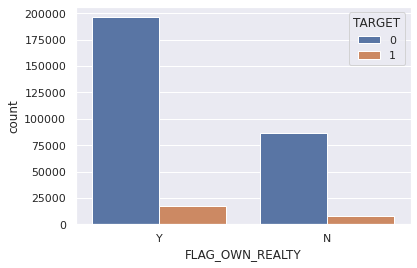

In [19]:

ax = sns.countplot(x="FLAG_OWN_REALTY", data=app_home_att_categorical, hue= 'TARGET')

In [20]:
def print_crosstab(df,column_name):
    cross_tab = pd.crosstab(df[column_name], df['TARGET'],margins=True, margins_name="Total")
    cross_tab_df = pd.DataFrame(cross_tab)
    cross_tab_df["Default %"] = (100*cross_tab_df[1]/cross_tab_df['Total']).round(3)
    cross_tab_df["Default %- Overall"] = (100*cross_tab_df[1]/cross_tab_df[1]['Total']).round(3)
    cross_tab_df["Population %- Overall"] = (100*cross_tab_df['Total']/cross_tab_df['Total']['Total']).round(3)
    
    return cross_tab_df

In [21]:
print_crosstab(app_home_att_categorical, 'FLAG_OWN_REALTY')

TARGET                0      1   Total  Default %  Default %- Overall  \
FLAG_OWN_REALTY                                                         
N                 86357   7842   94199      8.325              31.589   
Y                196329  16983  213312      7.962              68.411   
Total            282686  24825  307511      8.073             100.000   

TARGET           Population %- Overall  
FLAG_OWN_REALTY                         
N                               30.633  
Y                               69.367  
Total                          100.000

In [22]:
# 70% of the population own their house and the default % is slight less than 8%  
# and those don't own house/flat is greater than 8%

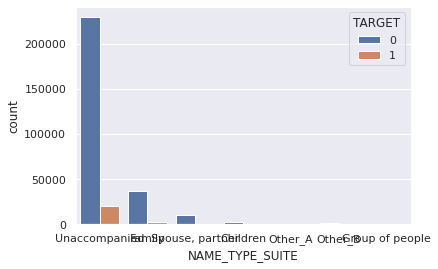

In [23]:
ax = sns.countplot(x="NAME_TYPE_SUITE", data=app_home_att_categorical, hue= 'TARGET')

In [24]:
print_crosstab(app_home_att_categorical, 'NAME_TYPE_SUITE')

TARGET                0      1   Total  Default %  Default %- Overall  \
NAME_TYPE_SUITE                                                         
Children           3026    241    3267      7.377               0.971   
Family            37140   3009   40149      7.495              12.121   
Group of people     248     23     271      8.487               0.093   
Other_A             790     76     866      8.776               0.306   
Other_B            1596    174    1770      9.831               0.701   
Spouse, partner   10475    895   11370      7.872               3.605   
Unaccompanied    229411  20407  249818      8.169              82.203   
Total            282686  24825  307511      8.073             100.000   

TARGET           Population %- Overall  
NAME_TYPE_SUITE                         
Children                         1.062  
Family                          13.056  
Group of people                  0.088  
Other_A                          0.282  
Other_B                          0.576  
Spouse, partner                  3.697  
Unaccompanied                   81.239  
Total                          100.000

In [25]:
# 81% of the population lives unaccompanied where the default % is 8.1%. 
# People who lives with either spouse, childern or family has slight less probability of default around 7.4%.


In [26]:
# Adding Other_A, Other_B and Group of People with Others as their popluation is very less 
#compared to others and catergory not defined properly
app_home_att_categorical["NAME_TYPE_SUITE"] = app_home_att_categorical["NAME_TYPE_SUITE"].replace(["Other_A", "Other_B","Group of people","NOT_AVAIL"], "Others")
application["NAME_TYPE_SUITE"] = application["NAME_TYPE_SUITE"].replace(["Other_A", "Other_B","Group of people","NOT_AVAIL"], "Others")
app_home_att_categorical["NAME_TYPE_SUITE"] = app_home_att_categorical["NAME_TYPE_SUITE"].replace(["Children", "Spouse, partner" ], "Family")
application["NAME_TYPE_SUITE"] = application["NAME_TYPE_SUITE"].replace(["Children", "Spouse, partner" ], "Family")

In [27]:
print_crosstab(app_home_att_categorical, 'NAME_TYPE_SUITE')

TARGET                0      1   Total  Default %  Default %- Overall  \
NAME_TYPE_SUITE                                                         
Family            50641   4145   54786      7.566              16.697   
Others             2634    273    2907      9.391               1.100   
Unaccompanied    229411  20407  249818      8.169              82.203   
Total            282686  24825  307511      8.073             100.000   

TARGET           Population %- Overall  
NAME_TYPE_SUITE                         
Family                          17.816  
Others                           0.945  
Unaccompanied                   81.239  
Total                          100.000

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'House / apartment'),
  Text(1, 0, 'Rented apartment'),
  Text(2, 0, 'With parents'),
  Text(3, 0, 'Municipal apartment'),
  Text(4, 0, 'Office apartment'),
  Text(5, 0, 'Co-op apartment')])

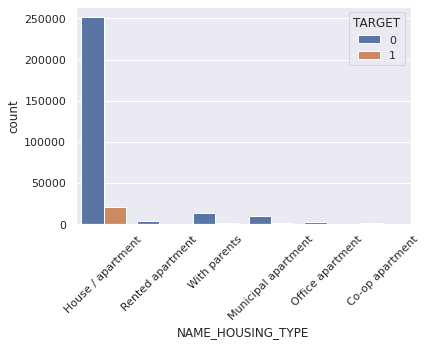

In [28]:
ax = sns.countplot(x="NAME_HOUSING_TYPE", data=app_home_att_categorical, hue= 'TARGET')
plt.xticks(rotation=45)

In [29]:
#NAME_HOUSING_TYPE
print_crosstab(app_home_att_categorical, 'NAME_HOUSING_TYPE')

TARGET                    0      1   Total  Default %  Default %- Overall  \
NAME_HOUSING_TYPE                                                           
Co-op apartment        1033     89    1122      7.932               0.359   
House / apartment    251596  21272  272868      7.796              85.688   
Municipal apartment   10228    955   11183      8.540               3.847   
Office apartment       2445    172    2617      6.572               0.693   
Rented apartment       4280    601    4881     12.313               2.421   
With parents          13104   1736   14840     11.698               6.993   
Total                282686  24825  307511      8.073             100.000   

TARGET               Population %- Overall  
NAME_HOUSING_TYPE                           
Co-op apartment                      0.365  
House / apartment                   88.734  
Municipal apartment                  3.637  
Office apartment                     0.851  
Rented apartment                     1.587  
With parents                         4.826  
Total                              100.000

In [30]:
# People who lives in rented or with thier parents have higer chance of getting default 
# than who lives in own or apartment from their work

In [31]:
app_home_att_categorical["NAME_HOUSING_TYPE"] = app_home_att_categorical["NAME_HOUSING_TYPE"]. \
replace(["Co-op apartment", "House / apartment", "Municipal apartment", "Office apartment", "Rented apartment",
        "With parents"], ["Co_Operative_apartment", "own_house_apartment", "Municipal", "Office", "Rented", 
                          "with_parents"])

application["NAME_HOUSING_TYPE"] = application["NAME_HOUSING_TYPE"]. \
replace(["Co-op apartment", "House / apartment", "Municipal apartment", "Office apartment", "Rented apartment",
        "With parents"], ["Co_Operative_apartment", "own_house_apartment", "Municipal", "Office", "Rented", 
                          "with_parents"])

In [32]:
app_home_att_categorical["NAME_HOUSING_TYPE"] = app_home_att_categorical["NAME_HOUSING_TYPE"]. \
replace(["Co_Operative_apartment", "Office"], "Others")

application["NAME_HOUSING_TYPE"] = application["NAME_HOUSING_TYPE"]. \
replace(["Co_Operative_apartment", "Office"], "Others")

In [33]:
#FONDKAPREMONT_MODE
print_crosstab(app_home_att_categorical, 'FONDKAPREMONT_MODE')

TARGET                      0      1   Total  Default %  Default %- Overall  \
FONDKAPREMONT_MODE                                                            
NOT_AVAIL              192170  18125  210295      8.619              73.011   
not specified            5258    429    5687      7.544               1.728   
org spec account         5292    327    5619      5.820               1.317   
reg oper account        68678   5152   73830      6.978              20.753   
reg oper spec account   11288    792   12080      6.556               3.190   
Total                  282686  24825  307511      8.073             100.000   

TARGET                 Population %- Overall  
FONDKAPREMONT_MODE                            
NOT_AVAIL                             68.386  
not specified                          1.849  
org spec account                       1.827  
reg oper account                      24.009  
reg oper spec account                  3.928  
Total                                100.000

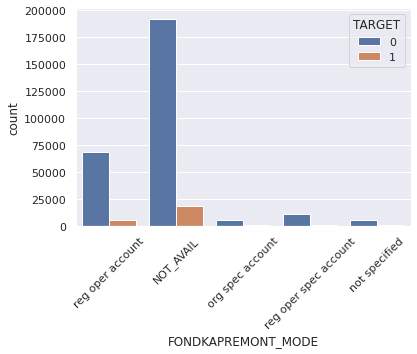

In [34]:
ax = sns.countplot(x="FONDKAPREMONT_MODE", data=app_home_att_categorical, hue= 'TARGET')
plt.xticks(rotation=45)
plt.show()

In [35]:
#FONDKAPREMONT_MODE
print_crosstab(app_home_att_categorical, 'FONDKAPREMONT_MODE')

TARGET                      0      1   Total  Default %  Default %- Overall  \
FONDKAPREMONT_MODE                                                            
NOT_AVAIL              192170  18125  210295      8.619              73.011   
not specified            5258    429    5687      7.544               1.728   
org spec account         5292    327    5619      5.820               1.317   
reg oper account        68678   5152   73830      6.978              20.753   
reg oper spec account   11288    792   12080      6.556               3.190   
Total                  282686  24825  307511      8.073             100.000   

TARGET                 Population %- Overall  
FONDKAPREMONT_MODE                            
NOT_AVAIL                             68.386  
not specified                          1.849  
org spec account                       1.827  
reg oper account                      24.009  
reg oper spec account                  3.928  
Total                                100.000

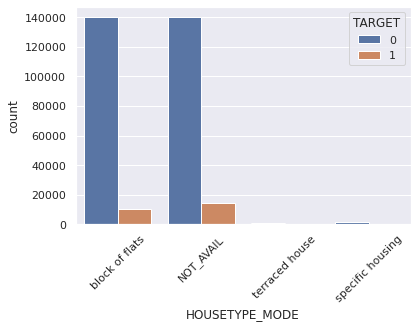

In [36]:
ax = sns.countplot(x="HOUSETYPE_MODE", data=app_home_att_categorical, hue= 'TARGET')
plt.xticks(rotation=45)
plt.show()

In [37]:
#HOUSETYPE_MODE
print_crosstab(app_home_att_categorical, 'HOUSETYPE_MODE')

TARGET                 0      1   Total  Default %  Default %- Overall  \
HOUSETYPE_MODE                                                           
NOT_AVAIL         140177  14120  154297      9.151              56.878   
block of flats    140053  10450  150503      6.943              42.095   
specific housing    1347    152    1499     10.140               0.612   
terraced house      1109    103    1212      8.498               0.415   
Total             282686  24825  307511      8.073             100.000   

TARGET            Population %- Overall  
HOUSETYPE_MODE                           
NOT_AVAIL                        50.176  
block of flats                   48.942  
specific housing                  0.487  
terraced house                    0.394  
Total                           100.000

In [38]:
# 50% of the data is missing or not available
# 48% of the data is block of flats
# and only 0.8% of the data is specfic or housing type
# Dropping this column due to no variance in the column

app_home_att_categorical = app_home_att_categorical.drop("HOUSETYPE_MODE", axis =1)

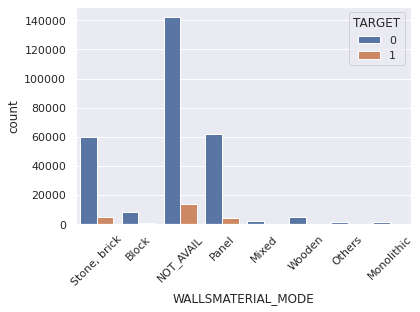

In [39]:
ax = sns.countplot(x="WALLSMATERIAL_MODE", data=app_home_att_categorical, hue= 'TARGET')
plt.xticks(rotation=45)
plt.show()

In [40]:
#HOUSETYPE_MODE
print_crosstab(app_home_att_categorical, 'WALLSMATERIAL_MODE')

TARGET                   0      1   Total  Default %  Default %- Overall  \
WALLSMATERIAL_MODE                                                         
Block                 8603    650    9253      7.025               2.618   
Mixed                 2123    173    2296      7.535               0.697   
Monolithic            1695     84    1779      4.722               0.338   
NOT_AVAIL           142070  14271  156341      9.128              57.486   
Others                1490    135    1625      8.308               0.544   
Panel                61848   4192   66040      6.348              16.886   
Stone, brick         60015   4800   64815      7.406              19.335   
Wooden                4842    520    5362      9.698               2.095   
Total               282686  24825  307511      8.073             100.000   

TARGET              Population %- Overall  
WALLSMATERIAL_MODE                         
Block                               3.009  
Mixed                               0.747  
Monolithic                          0.579  
NOT_AVAIL                          50.841  
Others                              0.528  
Panel                              21.476  
Stone, brick                       21.077  
Wooden                              1.744  
Total                             100.000

In [41]:
# more than 50% of the data is missing 
# dropping this columns 

app_home_att_categorical = app_home_att_categorical.drop("WALLSMATERIAL_MODE", axis =1)

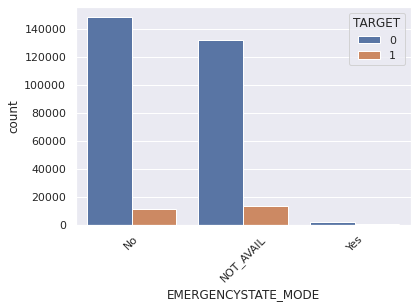

In [42]:
#EMERGENCYSTATE_MODE
ax = sns.countplot(x="EMERGENCYSTATE_MODE", data=app_home_att_categorical, hue= 'TARGET')
plt.xticks(rotation=45)
plt.show()

In [43]:
#HOUSETYPE_MODE
print_crosstab(app_home_att_categorical, 'EMERGENCYSTATE_MODE')

TARGET                    0      1   Total  Default %  Default %- Overall  \
EMERGENCYSTATE_MODE                                                         
NOT_AVAIL            132257  13498  145755      9.261              54.373   
No                   148324  11104  159428      6.965              44.729   
Yes                    2105    223    2328      9.579               0.898   
Total                282686  24825  307511      8.073             100.000   

TARGET               Population %- Overall  
EMERGENCYSTATE_MODE                         
NOT_AVAIL                           47.398  
No                                  51.845  
Yes                                  0.757  
Total                              100.000

In [44]:
# Column has no variance in the data. 48% missing - 51% No  only 0.7% YES 
# Dropping this columns
app_home_att_categorical = app_home_att_categorical.drop("EMERGENCYSTATE_MODE", axis =1)

In [45]:
app_home_att_categorical.head()

SK_ID_CURR  TARGET FLAG_OWN_REALTY NAME_TYPE_SUITE    NAME_HOUSING_TYPE  \
0      100002       1               Y   Unaccompanied  own_house_apartment   
1      100003       0               N          Family  own_house_apartment   
2      100004       0               Y   Unaccompanied  own_house_apartment   
3      100006       0               Y   Unaccompanied  own_house_apartment   
4      100007       0               Y   Unaccompanied  own_house_apartment   

  FONDKAPREMONT_MODE  
0   reg oper account  
1   reg oper account  
2          NOT_AVAIL  
3          NOT_AVAIL  
4          NOT_AVAIL

### NUMERICAL VARIABLES

In [46]:
## FOR NUMERICAL TYPE ATTRIBUTES
## ===================================
# Deleting the rows which has most of the housing attributes missing causing reduction of 50% of the data. 
# So not droping the rows
# Will impute the missing value with median of combination Income, 
#NAME_TYPE_SUITE (Family, Unacc., Single, With Wife), REGION_POPULATION_RELATIVE , NAME_HOUSING_TYPE

In [47]:
# Missing Value Impuration
application["AMT_INCOME_TOTAL"].describe([0.1, 0.2, 0.3, 0.7, 0.9, 0.95, 0.99])

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
10%      8.100000e+04
20%      9.900000e+04
30%      1.125000e+05
50%      1.471500e+05
70%      1.800000e+05
90%      2.700000e+05
95%      3.375000e+05
99%      4.725000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

#### 2.1.1 OUTLIER DETECTION AND REMOVAL

In [48]:
# Capping the income amount to remove outlier in the income
application["AMT_INCOME_TOTAL"]= application["AMT_INCOME_TOTAL"].clip(application["AMT_INCOME_TOTAL"].min(), 400000)

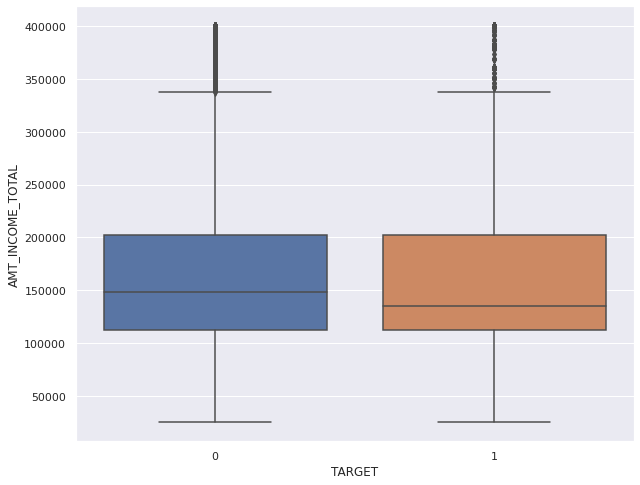

In [49]:
plt.figure(figsize=(10,8))
sns.boxplot(y = application["AMT_INCOME_TOTAL"], x= application["TARGET"])
plt.show()

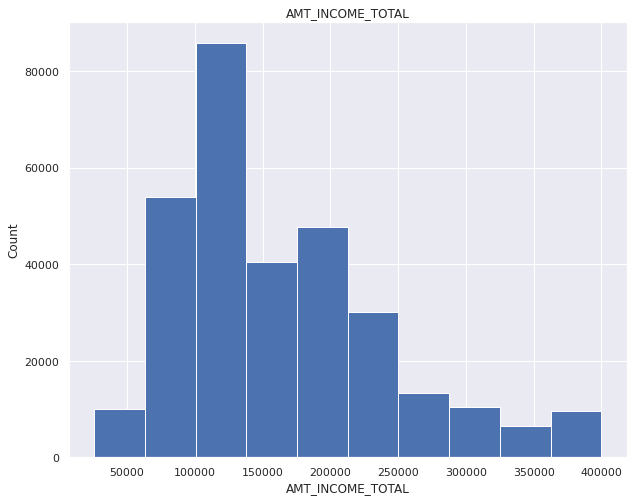

In [50]:
plt.figure(figsize=(10,8))
plt.hist(application["AMT_INCOME_TOTAL"])
plt.ylabel("Count")
plt.xlabel("AMT_INCOME_TOTAL")
plt.title("AMT_INCOME_TOTAL")
plt.show()

In [51]:
# Bin INCOME TOTAL into 4 Categories
#[10- 20 percentile] < 99000.000000 === LOWER CLASS
#[20- 50 percentile] > 99000.000000  and < 147150.000000 == MIDDLE CLASS
#[50- 70 percentile] > 147150.000000 AND < 180000.000000 = UPPER MIDDLE CLASS
#[> 70 percentile] > 180000.000000 UPPER CLASS

def binning_for_income(income):
    if income <= 120000:
        return "LOWER"
    elif income >120000 and income <= 180000:
        return "MIDDLE"
    elif income >180000 and income <= 250000:
        return "UPPER_MIDDLE"
    else:
        return "UPPER"
application["INCOME_CLASS"] = application.apply(lambda x: binning_for_income(x["AMT_INCOME_TOTAL"]), axis =1) 

In [52]:
#HOUSETYPE_MODE
print_crosstab(application, 'INCOME_CLASS')

TARGET             0      1   Total  Default %  Default %- Overall  \
INCOME_CLASS                                                         
LOWER          94651   8686  103337      8.406              34.989   
MIDDLE        102678   9569  112247      8.525              38.546   
UPPER          37232   2546   39778      6.401              10.256   
UPPER_MIDDLE   48125   4024   52149      7.716              16.209   
Total         282686  24825  307511      8.073             100.000   

TARGET        Population %- Overall  
INCOME_CLASS                         
LOWER                        33.604  
MIDDLE                       36.502  
UPPER                        12.935  
UPPER_MIDDLE                 16.958  
Total                       100.000

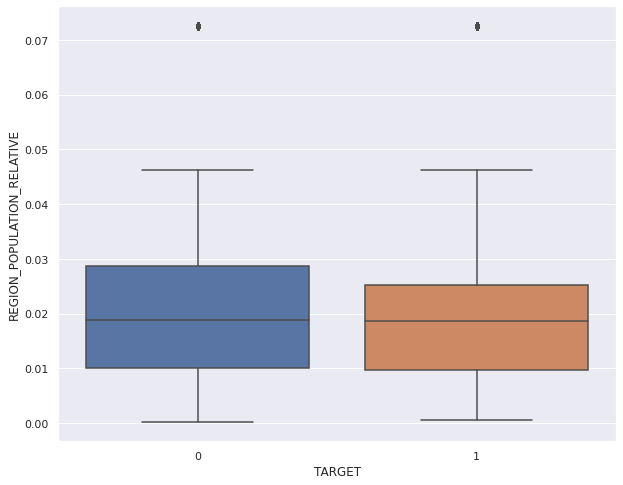

In [53]:
#REGION_POPULATION_RELATIVE
plt.figure(figsize=(10,8))
sns.boxplot(y = application["REGION_POPULATION_RELATIVE"], x= application["TARGET"])
plt.show()

In [54]:
application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  own_house_apartment   
1               Higher education               Married  own_house_apartment   
2  Secondary / secondary special  Single / not married  own_house_apartment   
3  Secondary / secondary special        Civil marriage  own_house_apartment   
4  Secondary / secondary special  Single / not married  own_house_apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2            

In [55]:
# Missing Value Impuration
application["AMT_CREDIT"].describe([0.1, 0.2, 0.3, 0.7, 0.9, 0.95, 0.99])

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
10%      1.800000e+05
20%      2.547000e+05
30%      3.063060e+05
50%      5.135310e+05
70%      7.551900e+05
90%      1.133748e+06
95%      1.350000e+06
99%      1.854000e+06
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [56]:
# Capping the income amount to remove outlier in the income
application["AMT_CREDIT"]= application["AMT_CREDIT"].clip(application["AMT_CREDIT"].min(), 1850000)

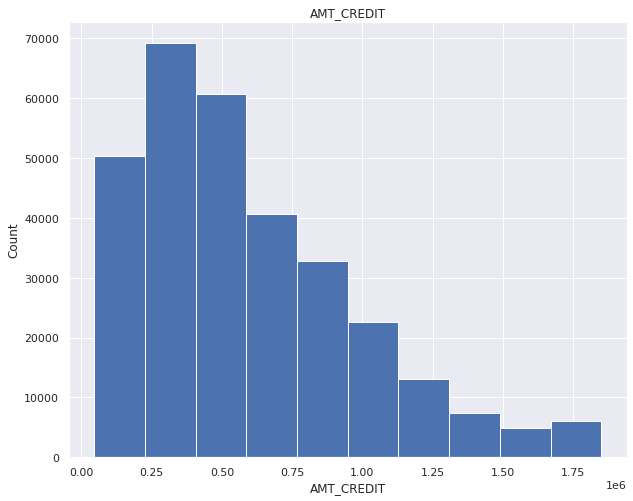

In [57]:
plt.figure(figsize=(10,8))
plt.hist(application["AMT_CREDIT"])
plt.ylabel("Count")
plt.xlabel("AMT_CREDIT")
plt.title("AMT_CREDIT")
plt.show()

In [58]:
# Missing Value Impuration
application["AMT_ANNUITY"].describe([0.1, 0.2, 0.3, 0.7, 0.9, 0.95, 0.99])

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
10%       11074.500000
20%       14701.500000
30%       18189.000000
50%       24903.000000
70%       32004.000000
90%       45954.000000
95%       53325.000000
99%       70006.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [59]:
# Capping the income amount to remove outlier in the income
application["AMT_ANNUITY"]= application["AMT_ANNUITY"].clip(application["AMT_ANNUITY"].min(), 70006)

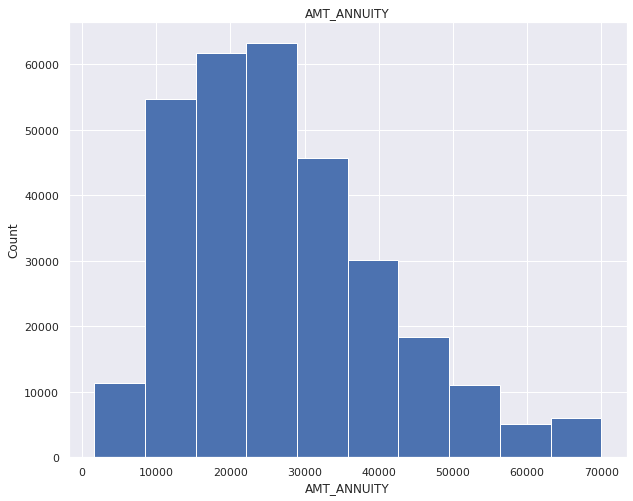

In [60]:
plt.figure(figsize=(10,8))
plt.hist(application["AMT_ANNUITY"])
plt.ylabel("Count")
plt.xlabel("AMT_ANNUITY")
plt.title("AMT_ANNUITY")
plt.show()

In [61]:
# Bin INCOME TOTAL into 4 Categories
#[10- 20 percentile] < 0.01 === LOWER CLASS
#[20- 50 percentile] > 0.01  and < 0.02 == MIDDLE CLASS
#[50- 70 percentile] > 0.02 AND < 0.03 = UPPER MIDDLE CLASS
#[> 70 percentile] > 0.03 UPPER CLASS

def binning_for_region_population(density):
    if density <= 0.01:
        return "LOWER"
    elif density >0.01 and density <= 0.02:
        return "MIDDLE"
    elif density >0.02 and density <= 0.025:
        return "UPPER_MIDDLE"
    else:
        return "UPPER"
application["REGION_POPULATION_CLASS"] = application.apply(lambda x: binning_for_region_population(x["REGION_POPULATION_RELATIVE"]), axis =1) 

In [62]:
#HOUSETYPE_MODE
print_crosstab(application, 'REGION_POPULATION_CLASS')

TARGET                        0      1   Total  Default %  Default %- Overall  \
REGION_POPULATION_CLASS                                                         
LOWER                     68041   6520   74561      8.745              26.264   
MIDDLE                    89174   8288   97462      8.504              33.386   
UPPER                     96062   7028  103090      6.817              28.310   
UPPER_MIDDLE              29409   2989   32398      9.226              12.040   
Total                    282686  24825  307511      8.073             100.000   

TARGET                   Population %- Overall  
REGION_POPULATION_CLASS                         
LOWER                                   24.247  
MIDDLE                                  31.694  
UPPER                                   33.524  
UPPER_MIDDLE                            10.536  
Total                                  100.000

In [63]:
# Fill housing attributes missing values
#for col in app_home_att_numerical.columns:
 #   if application[col].isnull().sum() >0:
  #      print(col)
   #     application[col] = application.groupby(["INCOME_CLASS","NAME_HOUSING_TYPE", "NAME_TYPE_SUITE", "REGION_POPULATION_CLASS"])[col].transform(lambda x: x.fillna(x.median()))

In [64]:
missing(application)

Total    Percent
COMMONAREA_MODE               214865  69.872297
COMMONAREA_AVG                214865  69.872297
COMMONAREA_MEDI               214865  69.872297
NONLIVINGAPARTMENTS_MEDI      213514  69.432963
NONLIVINGAPARTMENTS_AVG       213514  69.432963
NONLIVINGAPARTMENTS_MODE      213514  69.432963
FONDKAPREMONT_MODE            210295  68.386172
LIVINGAPARTMENTS_MEDI         210199  68.354953
LIVINGAPARTMENTS_AVG          210199  68.354953
LIVINGAPARTMENTS_MODE         210199  68.354953
FLOORSMIN_MEDI                208642  67.848630
FLOORSMIN_AVG                 208642  67.848630
FLOORSMIN_MODE                208642  67.848630
YEARS_BUILD_MEDI              204488  66.497784
YEARS_BUILD_MODE              204488  66.497784
YEARS_BUILD_AVG               204488  66.497784
OWN_CAR_AGE                   202929  65.990810
LANDAREA_MODE                 182590  59.376738
LANDAREA_AVG                  182590  59.376738
LANDAREA_MEDI                 182590  59.376738
BASEMENTAREA_MODE             179943  58.515956
BASEMENTAREA_MEDI             179943  58.515956
BASEMENTAREA_AVG              179943  58.515956
EXT_SOURCE_1                  173378  56.381073
NONLIVINGAREA_AVG             169682  55.179164
NONLIVINGAREA_MODE            169682  55.179164
NONLIVINGAREA_MEDI            169682  55.179164
ELEVATORS_MODE                163891  53.295980
ELEVATORS_AVG                 163891  53.295980
ELEVATORS_MEDI                163891  53.295980
WALLSMATERIAL_MODE            156341  50.840783
APARTMENTS_MEDI               156061  50.749729
APARTMENTS_AVG                156061  50.749729
APARTMENTS_MODE               156061  50.749729
ENTRANCES_AVG                 154828  50.348768
ENTRANCES_MODE                154828  50.348768
ENTRANCES_MEDI                154828  50.348768
LIVINGAREA_MEDI               154350  50.193326
LIVINGAREA_MODE               154350  50.193326
LIVINGAREA_AVG                154350  50.193326
HOUSETYPE_MODE                154297  50.176091
FLOORSMAX_MEDI                153020  49.760822
FLOORSMAX_AVG                 153020  49.760822
FLOORSMAX_MODE                153020  49.760822
YEARS_BEGINEXPLUATATION_AVG   150007  48.781019
YEARS_BEGINEXPLUATATION_MODE  150007  48.781019
YEARS_BEGINEXPLUATATION_MEDI  150007  48.781019
TOTALAREA_MODE                148431  48.268517
EMERGENCYSTATE_MODE           145755  47.398304
OCCUPATION_TYPE                96391  31.345545
EXT_SOURCE_3                   60965  19.825307
AMT_REQ_CREDIT_BUREAU_WEEK     41519  13.501631
AMT_REQ_CREDIT_BUREAU_DAY      41519  13.501631
AMT_REQ_CREDIT_BUREAU_QRT      41519  13.501631
AMT_REQ_CREDIT_BUREAU_MON      41519  13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     41519  13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     41519  13.501631
DEF_30_CNT_SOCIAL_CIRCLE        1021   0.332021
DEF_60_CNT_SOCIAL_CIRCLE        1021   0.332021
OBS_30_CNT_SOCIAL_CIRCLE        1021   0.332021
OBS_60_CNT_SOCIAL_CIRCLE        1021   0.332021
EXT_SOURCE_2                     660   0.214626
AMT_GOODS_PRICE                  278   0.090403
AMT_ANNUITY                       12   0.003902
CNT_FAM_MEMBERS                    2   0.000650
DAYS_LAST_PHONE_CHANGE             1   0.000325
FLAG_MOBIL                         0   0.000000
FLAG_EMP_PHONE                     0   0.000000
FLAG_WORK_PHONE                    0   0.000000
FLAG_CONT_MOBILE                   0   0.000000
FLAG_PHONE                         0   0.000000
FLAG_EMAIL                         0   0.000000
AMT_INCOME_TOTAL                   0   0.000000
TARGET                             0   0.000000
NAME_FAMILY_STATUS                 0   0.000000
DAYS_ID_PUBLISH                    0   0.000000
DAYS_REGISTRATION                  0   0.000000
DAYS_EMPLOYED                      0   0.000000
DAYS_BIRTH                         0   0.000000
REGION_RATING_CLIENT_W_CITY        0   0.000000
REGION_POPULATION_RELATIVE         0   0.000000
NAME_HOUSING_TYPE                  0   0.000000
NAME_EDUCATION_TYPE                0   0.000000

In [65]:
application[application["FLOORSMIN_AVG"].isnull()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
2         135000.0   Unaccompanied               Working   
3         297000.0   Unaccompanied               Working   
4         513000.0   Unaccompanied               Working   
5         454500.0          Family         State servant   
6        1395000.0   Unaccompanied  Commercial associate   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
2  Secondary / secondary special  Single / not married  own_house_apartment   
3  Secondary / secondary special        Civil marriage  own_house_apartment   
4  Secondary / secondary special  Single / not married  own_house_apartment   
5  Secondary / secondary special               Married  own_house_apartment   
6               Higher education               Married  own_house_apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   
5             -477          NaN           1               1                1   
6             -619         17.0           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   
5                 1           1           0        Laborers              2.0   
6                 1           1           0     Accountants              3.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
2                     2                            2   
3                     2                            2   
4                     2                            2   
5                     2                            2   
6                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   
5                  WEDNESDAY                       16   
6                     SUNDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
2                           0                           0   
3                           0               

In [66]:
app_home_att_numerical = application[house_attributes].select_dtypes(['float64', 'int64'])

In [67]:
app_home_att_numerical.head()

SK_ID_CURR  TARGET  REGION_POPULATION_RELATIVE  APARTMENTS_AVG  \
0      100002       1                    0.018801          0.0247   
1      100003       0                    0.003541          0.0959   
2      100004       0                    0.010032             NaN   
3      100006       0                    0.008019             NaN   
4      100007       0                    0.028663             NaN   

   BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  \
0            0.0369                       0.9722           0.6192   
1            0.0529                       0.9851           0.7960   
2               NaN                          NaN              NaN   
3               NaN                          NaN              NaN   
4               NaN                          NaN              NaN   

   COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  \
0          0.0143           0.00         0.0690         0.0833         0.1250   
1          0.0605           0.08         0.0345         0.2917         0.3333   
2             NaN            NaN            NaN            NaN            NaN   
3             NaN            NaN            NaN            NaN            NaN   
4             NaN            NaN            NaN            NaN            NaN   

   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  \
0        0.0369                0.0202          0.0190   
1        0.0130                0.0773          0.0549   
2           NaN                   NaN             NaN   
3           NaN                   NaN             NaN   
4           NaN                   NaN             NaN   

   NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  \
0                   0.0000             0.0000           0.0252   
1                   0.0039             0.0098           0.0924   
2                      NaN                NaN              NaN   
3                      NaN                NaN              NaN   
4                      NaN                NaN              NaN   

   BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  \
0             0.0383                        0.9722            0.6341   
1             0.0538                        0.9851            0.8040   
2                NaN                           NaN               NaN   
3                NaN                           NaN               NaN   
4                NaN                           NaN               NaN   

   COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  \
0           0.0144          0.0000          0.0690          0.0833   
1           0.0497          0.0806          0.0345          0.2917   
2              NaN             NaN             NaN             NaN   
3              NaN             NaN             NaN             NaN   
4              NaN             NaN             NaN             NaN   

   FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  \
0          0.1250         0.0377                  0.022           0.0198   
1          0.3333         0.0128                  0.079           0.0554   
2             NaN            NaN                    NaN              NaN   
3             NaN            NaN                    NaN              NaN   
4             NaN            NaN                    NaN              NaN   

   NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  \
0                       0.0                 0.0           0.0250   
1                       0.0                 0.0           0.0968   
2                       NaN                 NaN              NaN   
3                       NaN                 NaN              NaN   
4                       NaN                 NaN              NaN   

   BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  \
0             0.0369                        0.9722            0.6243   
1             0.0529                        0.9851            0.7987   
2         

In [68]:
# lot of numerical attributes of duplicate information like their AVG, MEDIAN, MODE
# We will check the pairwise correlation and correlation with target variable to keep the final one
# Filling missing value to 0 as data is missing for those who does not own house and flata


In [69]:
# Pairwise Correlation of variables
app_home_att_numerical[['APARTMENTS_AVG', 'APARTMENTS_MODE', 'APARTMENTS_MEDI', 'TARGET']].corr(method ='spearman') 
# Apartment_AVG has better correlation with Target variable - so dropping other variables

APARTMENTS_AVG  APARTMENTS_MODE  APARTMENTS_MEDI    TARGET
APARTMENTS_AVG         1.000000         0.964837         0.995231 -0.035002
APARTMENTS_MODE        0.964837         1.000000         0.970022 -0.033026
APARTMENTS_MEDI        0.995231         0.970022         1.000000 -0.034545
TARGET                -0.035002        -0.033026        -0.034545  1.000000

In [70]:
# drop the columns
app_home_att_numerical = app_home_att_numerical.drop(['APARTMENTS_MODE', 'APARTMENTS_MEDI'], axis =1)

In [71]:
def feature_reduction_mean_median(df, variable_name):
    features_col = [variable_name + "_AVG", variable_name+"_MODE", variable_name+"_MEDI", "TARGET"]
    return app_home_att_numerical[features_col].corr(method ='spearman')

feature_reduction_mean_median(app_home_att_numerical,"BASEMENTAREA")
# BASEMENTAREA_AVG has maximum = -0.22746
# drop the columns


BASEMENTAREA_AVG  BASEMENTAREA_MODE  BASEMENTAREA_MEDI  \
BASEMENTAREA_AVG           1.000000           0.959931           0.994929   
BASEMENTAREA_MODE          0.959931           1.000000           0.963427   
BASEMENTAREA_MEDI          0.994929           0.963427           1.000000   
TARGET                    -0.023249          -0.019025          -0.022691   

                     TARGET  
BASEMENTAREA_AVG  -0.023249  
BASEMENTAREA_MODE -0.019025  
BASEMENTAREA_MEDI -0.022691  
TARGET             1.000000

In [72]:
app_home_att_numerical = app_home_att_numerical.drop(['BASEMENTAREA_MODE', 'BASEMENTAREA_MODE'], axis =1)

In [73]:
feature_reduction_mean_median(app_home_att_numerical,"YEARS_BEGINEXPLUATATION")
# YEARS_BEGINEXPLUATATION_MEDI has highest correaltion -0.009993

YEARS_BEGINEXPLUATATION_AVG  \
YEARS_BEGINEXPLUATATION_AVG                      1.000000   
YEARS_BEGINEXPLUATATION_MODE                     0.985231   
YEARS_BEGINEXPLUATATION_MEDI                     0.997432   
TARGET                                          -0.027387   

                              YEARS_BEGINEXPLUATATION_MODE  \
YEARS_BEGINEXPLUATATION_AVG                       0.985231   
YEARS_BEGINEXPLUATATION_MODE                      1.000000   
YEARS_BEGINEXPLUATATION_MEDI                      0.985670   
TARGET                                           -0.027138   

                              YEARS_BEGINEXPLUATATION_MEDI    TARGET  
YEARS_BEGINEXPLUATATION_AVG                       0.997432 -0.027387  
YEARS_BEGINEXPLUATATION_MODE                      0.985670 -0.027138  
YEARS_BEGINEXPLUATATION_MEDI                      1.000000 -0.027544  
TARGET                                           -0.027544  1.000000

In [74]:
app_home_att_numerical = app_home_att_numerical.drop(['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE'], axis =1)

In [75]:
feature_reduction_mean_median(app_home_att_numerical,"YEARS_BUILD")

YEARS_BUILD_AVG  YEARS_BUILD_MODE  YEARS_BUILD_MEDI  \
YEARS_BUILD_AVG          1.000000          0.987791          0.998411   
YEARS_BUILD_MODE         0.987791          1.000000          0.988070   
YEARS_BUILD_MEDI         0.998411          0.988070          1.000000   
TARGET                  -0.023208         -0.023078         -0.023357   

                    TARGET  
YEARS_BUILD_AVG  -0.023208  
YEARS_BUILD_MODE -0.023078  
YEARS_BUILD_MEDI -0.023357  
TARGET            1.000000

In [76]:
app_home_att_numerical = app_home_att_numerical.drop(['YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG'], axis =1)

In [77]:
feature_reduction_mean_median(app_home_att_numerical,"COMMONAREA")

COMMONAREA_AVG  COMMONAREA_MODE  COMMONAREA_MEDI    TARGET
COMMONAREA_AVG         1.000000         0.965539         0.995734 -0.018901
COMMONAREA_MODE        0.965539         1.000000         0.970918 -0.016127
COMMONAREA_MEDI        0.995734         0.970918         1.000000 -0.018516
TARGET                -0.018901        -0.016127        -0.018516  1.000000

In [78]:
app_home_att_numerical = app_home_att_numerical.drop(['COMMONAREA_MODE', 'COMMONAREA_MEDI'], axis =1)

In [79]:
feature_reduction_mean_median(app_home_att_numerical,"ELEVATORS")

ELEVATORS_AVG  ELEVATORS_MODE  ELEVATORS_MEDI    TARGET
ELEVATORS_AVG        1.000000        0.968827        0.991028 -0.038860
ELEVATORS_MODE       0.968827        1.000000        0.977774 -0.036845
ELEVATORS_MEDI       0.991028        0.977774        1.000000 -0.038447
TARGET              -0.038860       -0.036845       -0.038447  1.000000

In [80]:
app_home_att_numerical = app_home_att_numerical.drop(['ELEVATORS_MODE', 'ELEVATORS_MEDI'], axis =1)

In [81]:
feature_reduction_mean_median(app_home_att_numerical,"ENTRANCES")

ENTRANCES_AVG  ENTRANCES_MODE  ENTRANCES_MEDI    TARGET
ENTRANCES_AVG        1.000000        0.957861        0.993427 -0.024194
ENTRANCES_MODE       0.957861        1.000000        0.965184 -0.021635
ENTRANCES_MEDI       0.993427        0.965184        1.000000 -0.024032
TARGET              -0.024194       -0.021635       -0.024032  1.000000

In [82]:
app_home_att_numerical = app_home_att_numerical.drop(['ENTRANCES_MODE', 'ENTRANCES_MEDI'], axis =1)

In [83]:
feature_reduction_mean_median(app_home_att_numerical,"FLOORSMAX")

FLOORSMAX_AVG  FLOORSMAX_MODE  FLOORSMAX_MEDI    TARGET
FLOORSMAX_AVG        1.000000        0.981639        0.994876 -0.046178
FLOORSMAX_MODE       0.981639        1.000000        0.986487 -0.045357
FLOORSMAX_MEDI       0.994876        0.986487        1.000000 -0.046019
TARGET              -0.046178       -0.045357       -0.046019  1.000000

In [84]:
app_home_att_numerical = app_home_att_numerical.drop(['FLOORSMAX_MODE', 'FLOORSMAX_MEDI'], axis =1)

In [85]:
feature_reduction_mean_median(app_home_att_numerical,"FLOORSMIN")

FLOORSMIN_AVG  FLOORSMIN_MODE  FLOORSMIN_MEDI    TARGET
FLOORSMIN_AVG        1.000000        0.982649        0.996223 -0.032079
FLOORSMIN_MODE       0.982649        1.000000        0.986356 -0.030817
FLOORSMIN_MEDI       0.996223        0.986356        1.000000 -0.031862
TARGET              -0.032079       -0.030817       -0.031862  1.000000

In [86]:
app_home_att_numerical = app_home_att_numerical.drop(['FLOORSMIN_MODE', 'FLOORSMIN_MEDI'], axis =1)

In [87]:
app_home_att_numerical[['FLOORSMIN_AVG', 'FLOORSMAX_AVG', 'TARGET']].corr(method='pearson')

FLOORSMIN_AVG  FLOORSMAX_AVG    TARGET
FLOORSMIN_AVG       1.000000       0.742437 -0.033614
FLOORSMAX_AVG       0.742437       1.000000 -0.044003
TARGET             -0.033614      -0.044003  1.000000

In [88]:
feature_reduction_mean_median(app_home_att_numerical,"LANDAREA")

LANDAREA_AVG  LANDAREA_MODE  LANDAREA_MEDI    TARGET
LANDAREA_AVG       1.000000       0.967293       0.996279 -0.013690
LANDAREA_MODE      0.967293       1.000000       0.970821 -0.011601
LANDAREA_MEDI      0.996279       0.970821       1.000000 -0.013394
TARGET            -0.013690      -0.011601      -0.013394  1.000000

In [89]:
app_home_att_numerical = app_home_att_numerical.drop(['LANDAREA_AVG', 'LANDAREA_MODE'], axis =1)

In [90]:
feature_reduction_mean_median(app_home_att_numerical,"LIVINGAPARTMENTS")

LIVINGAPARTMENTS_AVG  LIVINGAPARTMENTS_MODE  \
LIVINGAPARTMENTS_AVG               1.000000               0.969746   
LIVINGAPARTMENTS_MODE              0.969746               1.000000   
LIVINGAPARTMENTS_MEDI              0.996199               0.973672   
TARGET                            -0.031177              -0.029212   

                       LIVINGAPARTMENTS_MEDI    TARGET  
LIVINGAPARTMENTS_AVG                0.996199 -0.031177  
LIVINGAPARTMENTS_MODE               0.973672 -0.029212  
LIVINGAPARTMENTS_MEDI               1.000000 -0.030797  
TARGET                             -0.030797  1.000000

In [91]:
app_home_att_numerical = app_home_att_numerical.drop(['LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE'], axis =1)

In [92]:
feature_reduction_mean_median(app_home_att_numerical,"LIVINGAREA")

LIVINGAREA_AVG  LIVINGAREA_MODE  LIVINGAREA_MEDI    TARGET
LIVINGAREA_AVG         1.000000         0.964163         0.995506 -0.041631
LIVINGAREA_MODE        0.964163         1.000000         0.969152 -0.039060
LIVINGAREA_MEDI        0.995506         0.969152         1.000000 -0.041140
TARGET                -0.041631        -0.039060        -0.041140  1.000000

In [93]:
app_home_att_numerical = app_home_att_numerical.drop(['LIVINGAREA_MEDI', 'LIVINGAREA_MODE'], axis =1)

In [94]:
feature_reduction_mean_median(app_home_att_numerical,"NONLIVINGAPARTMENTS")

NONLIVINGAPARTMENTS_AVG  NONLIVINGAPARTMENTS_MODE  \
NONLIVINGAPARTMENTS_AVG                  1.000000                  0.932255   
NONLIVINGAPARTMENTS_MODE                 0.932255                  1.000000   
NONLIVINGAPARTMENTS_MEDI                 0.981857                  0.951783   
TARGET                                  -0.006303                 -0.003666   

                          NONLIVINGAPARTMENTS_MEDI    TARGET  
NONLIVINGAPARTMENTS_AVG                   0.981857 -0.006303  
NONLIVINGAPARTMENTS_MODE                  0.951783 -0.003666  
NONLIVINGAPARTMENTS_MEDI                  1.000000 -0.005054  
TARGET                                   -0.005054  1.000000

In [95]:
app_home_att_numerical = app_home_att_numerical.drop(['NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI'], axis =1)

In [96]:
feature_reduction_mean_median(app_home_att_numerical,"NONLIVINGAREA")

NONLIVINGAREA_AVG  NONLIVINGAREA_MODE  NONLIVINGAREA_MEDI  \
NONLIVINGAREA_AVG            1.000000            0.918531            0.980959   
NONLIVINGAREA_MODE           0.918531            1.000000            0.941964   
NONLIVINGAREA_MEDI           0.980959            0.941964            1.000000   
TARGET                      -0.013977           -0.012511           -0.013150   

                      TARGET  
NONLIVINGAREA_AVG  -0.013977  
NONLIVINGAREA_MODE -0.012511  
NONLIVINGAREA_MEDI -0.013150  
TARGET              1.000000

In [97]:
app_home_att_numerical = app_home_att_numerical.drop(['NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI'], axis =1)

In [98]:
app_home_att_numerical[['BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', "TARGET"]].corr(method ='pearson')


BASEMENTAREA_AVG  BASEMENTAREA_MEDI    TARGET
BASEMENTAREA_AVG           1.000000           0.994317 -0.022746
BASEMENTAREA_MEDI          0.994317           1.000000 -0.022081
TARGET                    -0.022746          -0.022081  1.000000

In [99]:
app_home_att_numerical = app_home_att_numerical.drop(['BASEMENTAREA_MEDI'], axis =1)

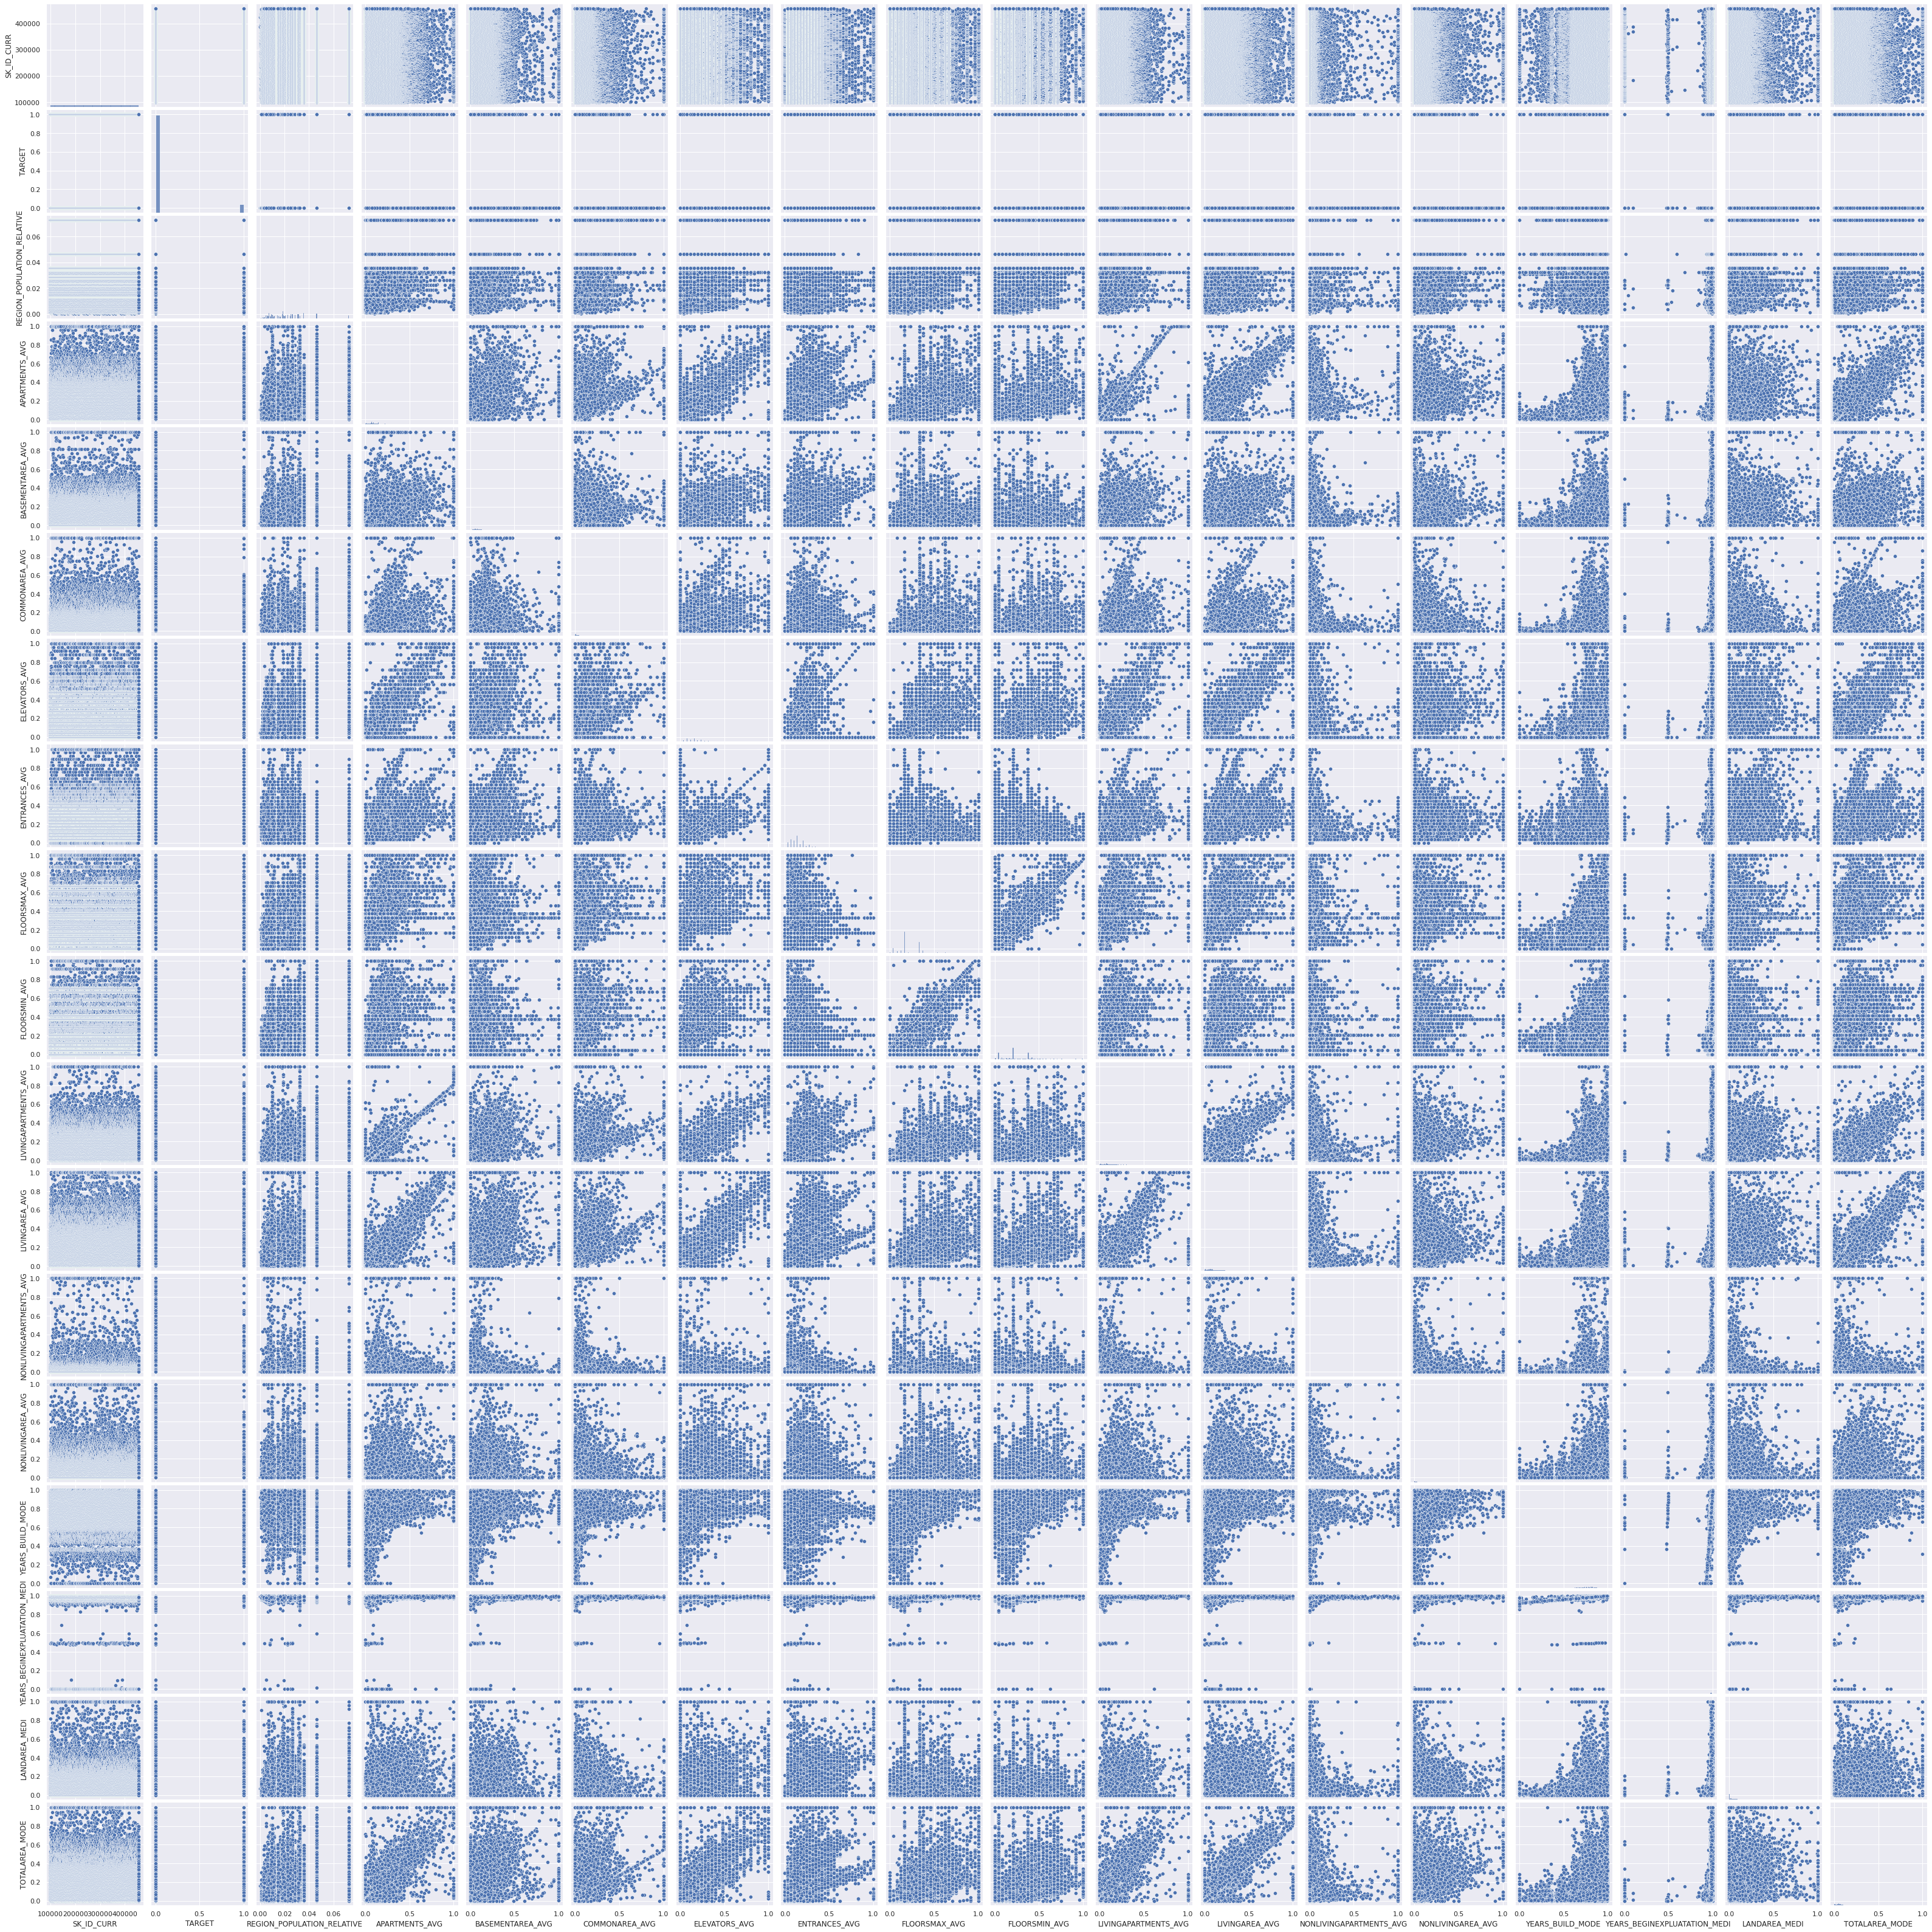

In [100]:
# Pairplot of all the house/flat related attributes
sns.pairplot(app_home_att_numerical)
plt.show()

<AxesSubplot:>

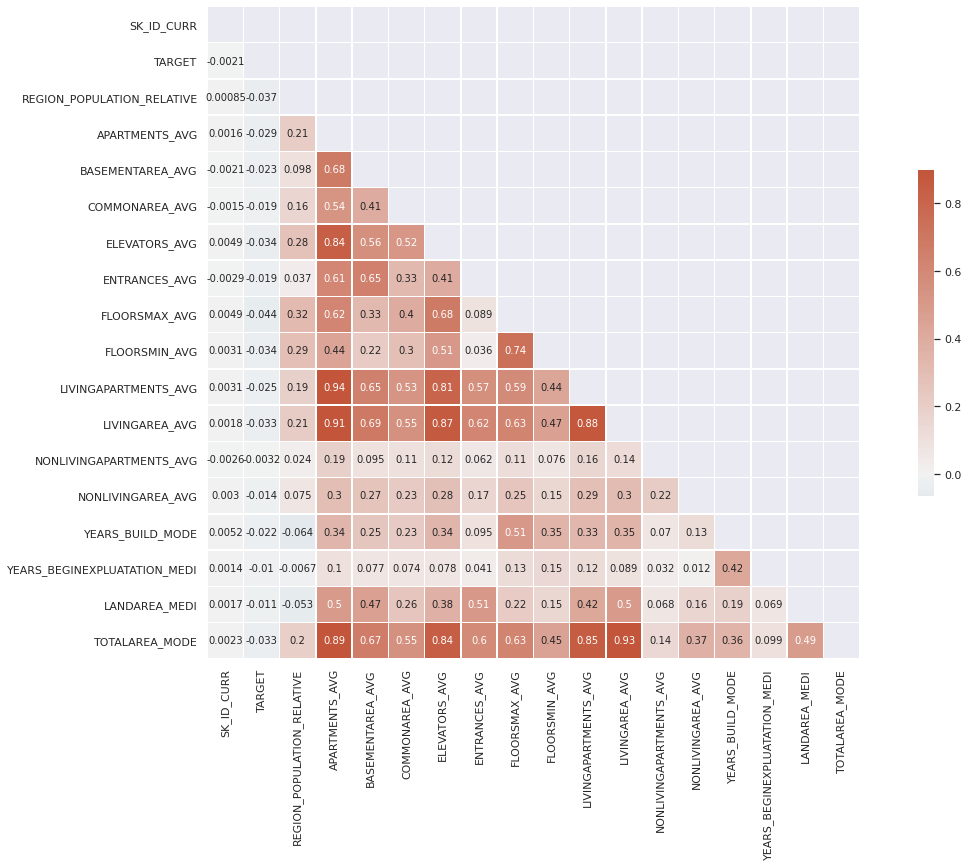

In [101]:
# Visualize the the numerical variables
# 1. Check the correlation with each other
corr = app_home_att_numerical.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(21, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot= True)

In [102]:
# Top 10 highly correlated variables
corr_dict = dict()
for col1 in app_home_att_numerical.columns:
    for col2 in app_home_att_numerical.columns:
        if col1 != col2:
            #print(col1, col2)
            corr_val = app_home_att_numerical[col1].corr(app_home_att_numerical[col2]).round(3)
            if col2 + " - "+ col1 not in list(corr_dict.keys()):
                corr_dict[col1 + " - "+ col2] = corr_val
            

In [103]:
sorted(corr_dict.items(), key = lambda kv:(kv[1], kv[0]), reverse= True)  

[('APARTMENTS_AVG - LIVINGAPARTMENTS_AVG', 0.944),
 ('LIVINGAREA_AVG - TOTALAREA_MODE', 0.925),
 ('APARTMENTS_AVG - LIVINGAREA_AVG', 0.914),
 ('APARTMENTS_AVG - TOTALAREA_MODE', 0.893),
 ('LIVINGAPARTMENTS_AVG - LIVINGAREA_AVG', 0.881),
 ('ELEVATORS_AVG - LIVINGAREA_AVG', 0.868),
 ('LIVINGAPARTMENTS_AVG - TOTALAREA_MODE', 0.848),
 ('ELEVATORS_AVG - TOTALAREA_MODE', 0.845),
 ('APARTMENTS_AVG - ELEVATORS_AVG', 0.837),
 ('ELEVATORS_AVG - LIVINGAPARTMENTS_AVG', 0.812),
 ('FLOORSMAX_AVG - FLOORSMIN_AVG', 0.742),
 ('BASEMENTAREA_AVG - LIVINGAREA_AVG', 0.693),
 ('ELEVATORS_AVG - FLOORSMAX_AVG', 0.68),
 ('APARTMENTS_AVG - BASEMENTAREA_AVG', 0.679),
 ('BASEMENTAREA_AVG - TOTALAREA_MODE', 0.672),
 ('BASEMENTAREA_AVG - ENTRANCES_AVG', 0.651),
 ('BASEMENTAREA_AVG - LIVINGAPARTMENTS_AVG', 0.647),
 ('FLOORSMAX_AVG - TOTALAREA_MODE', 0.633),
 ('FLOORSMAX_AVG - LIVINGAREA_AVG', 0.631),
 ('ENTRANCES_AVG - LIVINGAREA_AVG', 0.619),
 ('APARTMENTS_AVG - FLOORSMAX_AVG', 0.619),
 ('APARTMENTS_AVG - ENTRANCES

In [104]:
# There are few variables which are still highly correlated to each other 
#like total Apartment area avg is 95% correlated with livingapartments_avg
#Checking more than 90% correlation variables
app_home_att_numerical[['APARTMENTS_AVG', 'LIVINGAPARTMENTS_AVG',"LIVINGAREA_AVG","TOTALAREA_MODE", "TARGET"]].corr(method ='pearson')

APARTMENTS_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  \
APARTMENTS_AVG              1.000000              0.943952        0.913619   
LIVINGAPARTMENTS_AVG        0.943952              1.000000        0.880798   
LIVINGAREA_AVG              0.913619              0.880798        1.000000   
TOTALAREA_MODE              0.892627              0.848028        0.925039   
TARGET                     -0.029498             -0.025031       -0.032997   

                      TOTALAREA_MODE    TARGET  
APARTMENTS_AVG              0.892627 -0.029498  
LIVINGAPARTMENTS_AVG        0.848028 -0.025031  
LIVINGAREA_AVG              0.925039 -0.032997  
TOTALAREA_MODE              1.000000 -0.032596  
TARGET                     -0.032596  1.000000

In [105]:
# Target variable has 3.3% correlation with LivingArea and 3.25% correlated with totalArea.
# Going to keep Living area and dropping rest of higher multicollinear variables
app_home_att_numerical = app_home_att_numerical.drop(['APARTMENTS_AVG', 'LIVINGAPARTMENTS_AVG', 'TOTALAREA_MODE'], axis =1)

In [106]:
# Top 10 highly correlated variables
corr_dict = dict()
for col1 in app_home_att_numerical.columns:
    for col2 in app_home_att_numerical.columns:
        if col1 != col2:
            #print(col1, col2)
            corr_val = app_home_att_numerical[col1].corr(app_home_att_numerical[col2]).round(3)
            if col2 + " - "+ col1 not in list(corr_dict.keys()):
                corr_dict[col1 + " - "+ col2] = corr_val
            

In [107]:
sorted(corr_dict.items(), key = lambda kv:(kv[1], kv[0]), reverse= True)  

[('ELEVATORS_AVG - LIVINGAREA_AVG', 0.868),
 ('FLOORSMAX_AVG - FLOORSMIN_AVG', 0.742),
 ('BASEMENTAREA_AVG - LIVINGAREA_AVG', 0.693),
 ('ELEVATORS_AVG - FLOORSMAX_AVG', 0.68),
 ('BASEMENTAREA_AVG - ENTRANCES_AVG', 0.651),
 ('FLOORSMAX_AVG - LIVINGAREA_AVG', 0.631),
 ('ENTRANCES_AVG - LIVINGAREA_AVG', 0.619),
 ('BASEMENTAREA_AVG - ELEVATORS_AVG', 0.565),
 ('COMMONAREA_AVG - LIVINGAREA_AVG', 0.547),
 ('COMMONAREA_AVG - ELEVATORS_AVG', 0.522),
 ('ENTRANCES_AVG - LANDAREA_MEDI', 0.511),
 ('ELEVATORS_AVG - FLOORSMIN_AVG', 0.511),
 ('FLOORSMAX_AVG - YEARS_BUILD_MODE', 0.509),
 ('LIVINGAREA_AVG - LANDAREA_MEDI', 0.504),
 ('BASEMENTAREA_AVG - LANDAREA_MEDI', 0.47),
 ('FLOORSMIN_AVG - LIVINGAREA_AVG', 0.467),
 ('YEARS_BUILD_MODE - YEARS_BEGINEXPLUATATION_MEDI', 0.422),
 ('ELEVATORS_AVG - ENTRANCES_AVG', 0.405),
 ('BASEMENTAREA_AVG - COMMONAREA_AVG', 0.405),
 ('COMMONAREA_AVG - FLOORSMAX_AVG', 0.404),
 ('ELEVATORS_AVG - LANDAREA_MEDI', 0.377),
 ('LIVINGAREA_AVG - YEARS_BUILD_MODE', 0.354),
 ('FL

In [108]:
app_home_att_numerical.columns

Index(['SK_ID_CURR', 'TARGET', 'REGION_POPULATION_RELATIVE',
       'BASEMENTAREA_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'YEARS_BUILD_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'LANDAREA_MEDI'],
      dtype='object')

In [109]:
app_home_att_numerical = app_home_att_numerical.drop("FLOORSMAX_AVG", axis=1)

In [110]:
app_home_att_numerical["BASEMENTAREA_ELEVATORS"] = app_home_att_numerical.apply(lambda x:x["BASEMENTAREA_AVG"]+x["ELEVATORS_AVG"], axis=1)

In [111]:
app_home_att_numerical["BASEMENT_ELEVATORS_ENTERANCE_LIVINGAREA"] = app_home_att_numerical.apply(lambda x:x["BASEMENTAREA_ELEVATORS"]+x["LIVINGAREA_AVG"]+x["ENTRANCES_AVG"], axis=1)

### THE END PART 01

In [112]:
app_home_att_numerical = app_home_att_numerical.drop(["BASEMENTAREA_AVG", "ELEVATORS_AVG"], axis=1)

In [113]:
app_home_att_numerical = app_home_att_numerical.drop(["BASEMENTAREA_ELEVATORS", "LIVINGAREA_AVG", "ENTRANCES_AVG"], axis=1)

In [114]:
app_home_att_categorical.columns

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
       'NAME_HOUSING_TYPE', 'FONDKAPREMONT_MODE'],
      dtype='object')

In [115]:
missing(app_home_att_numerical)

Total    Percent
COMMONAREA_AVG                           214865  69.872297
NONLIVINGAPARTMENTS_AVG                  213514  69.432963
FLOORSMIN_AVG                            208642  67.848630
YEARS_BUILD_MODE                         204488  66.497784
BASEMENT_ELEVATORS_ENTERANCE_LIVINGAREA  184423  59.972814
LANDAREA_MEDI                            182590  59.376738
NONLIVINGAREA_AVG                        169682  55.179164
YEARS_BEGINEXPLUATATION_MEDI             150007  48.781019
REGION_POPULATION_RELATIVE                    0   0.000000
TARGET                                        0   0.000000
SK_ID_CURR                                    0   0.000000

In [116]:
app_home_att_numerical.head()

SK_ID_CURR  TARGET  REGION_POPULATION_RELATIVE  COMMONAREA_AVG  \
0      100002       1                    0.018801          0.0143   
1      100003       0                    0.003541          0.0605   
2      100004       0                    0.010032             NaN   
3      100006       0                    0.008019             NaN   
4      100007       0                    0.028663             NaN   

   FLOORSMIN_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  \
0         0.1250                   0.0000             0.0000   
1         0.3333                   0.0039             0.0098   
2            NaN                      NaN                NaN   
3            NaN                      NaN                NaN   
4            NaN                      NaN                NaN   

   YEARS_BUILD_MODE  YEARS_BEGINEXPLUATATION_MEDI  LANDAREA_MEDI  \
0            0.6341                        0.9722         0.0375   
1            0.8040                        0.9851         0.0132   
2               NaN                           NaN            NaN   
3               NaN                           NaN            NaN   
4               NaN                           NaN            NaN   

   BASEMENT_ELEVATORS_ENTERANCE_LIVINGAREA  
0                                   0.1249  
1                                   0.2223  
2                                      NaN  
3                                      NaN  
4                                      NaN

In [117]:
app_home_att_categorical.head()

SK_ID_CURR  TARGET FLAG_OWN_REALTY NAME_TYPE_SUITE    NAME_HOUSING_TYPE  \
0      100002       1               Y   Unaccompanied  own_house_apartment   
1      100003       0               N          Family  own_house_apartment   
2      100004       0               Y   Unaccompanied  own_house_apartment   
3      100006       0               Y   Unaccompanied  own_house_apartment   
4      100007       0               Y   Unaccompanied  own_house_apartment   

  FONDKAPREMONT_MODE  
0   reg oper account  
1   reg oper account  
2          NOT_AVAIL  
3          NOT_AVAIL  
4          NOT_AVAIL

In [118]:
application_home_attributes = pd.merge(app_home_att_numerical, app_home_att_categorical)

In [119]:
application_home_attributes.head()

SK_ID_CURR  TARGET  REGION_POPULATION_RELATIVE  COMMONAREA_AVG  \
0      100002       1                    0.018801          0.0143   
1      100003       0                    0.003541          0.0605   
2      100004       0                    0.010032             NaN   
3      100006       0                    0.008019             NaN   
4      100007       0                    0.028663             NaN   

   FLOORSMIN_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  \
0         0.1250                   0.0000             0.0000   
1         0.3333                   0.0039             0.0098   
2            NaN                      NaN                NaN   
3            NaN                      NaN                NaN   
4            NaN                      NaN                NaN   

   YEARS_BUILD_MODE  YEARS_BEGINEXPLUATATION_MEDI  LANDAREA_MEDI  \
0            0.6341                        0.9722         0.0375   
1            0.8040                        0.9851         0.0132   
2               NaN                           NaN            NaN   
3               NaN                           NaN            NaN   
4               NaN                           NaN            NaN   

   BASEMENT_ELEVATORS_ENTERANCE_LIVINGAREA FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0                                   0.1249               Y   Unaccompanied   
1                                   0.2223               N          Family   
2                                      NaN               Y   Unaccompanied   
3                                      NaN               Y   Unaccompanied   
4                                      NaN               Y   Unaccompanied   

     NAME_HOUSING_TYPE FONDKAPREMONT_MODE  
0  own_house_apartment   reg oper account  
1  own_house_apartment   reg oper account  
2  own_house_apartment          NOT_AVAIL  
3  own_house_apartment          NOT_AVAIL  
4  own_house_apartment          NOT_AVAIL

In [120]:
application_home_attributes = application_home_attributes.fillna(0)

In [121]:
application_home_attributes.shape

(307511, 15)

In [122]:
house_attributes= ['FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','APARTMENTS_AVG',
                   'BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG',
                   'ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG',
                    'NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE',
                    'YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE',
                    'LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI',
                    'ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI',
                    'NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']


In [123]:
application = application.drop(house_attributes, axis=1)

In [124]:
application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120          NaN   
1      -16765          -1188            -1186.0             -291          NaN   
2      -19046           -225            -4260.0            -2531         26.0   
3      -19005          -3039            -9833.0            -2437          NaN   
4      -19932          -3038            -4311.0            -3458          NaN   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0        Laborers              1.0                     2   
1           0      Core staff              2.0                     1   
2           0        Laborers              1.0                     2   
3           0        Laborers              2.0                     2   
4           0      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1               

In [125]:
application.shape

(307511, 73)

In [126]:
final_application = pd.merge(application, application_home_attributes)

In [127]:
final_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120          NaN   
1      -16765          -1188            -1186.0             -291          NaN   
2      -19046           -225            -4260.0            -2531         26.0   
3      -19005          -3039            -9833.0            -2437          NaN   
4      -19932          -3038            -4311.0            -3458          NaN   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0        Laborers              1.0                     2   
1           0      Core staff              2.0                     1   
2           0        Laborers              1.0                     2   
3           0        Laborers              2.0                     2   
4           0      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1               

In [128]:
final_application.shape

(307511, 86)

In [129]:
print_crosstab(final_application, 'FLAG_DOCUMENT_2')

TARGET                0      1   Total  Default %  Default %- Overall  \
FLAG_DOCUMENT_2                                                         
0                282677  24821  307498      8.072              99.984   
1                     9      4      13     30.769               0.016   
Total            282686  24825  307511      8.073             100.000   

TARGET           Population %- Overall  
FLAG_DOCUMENT_2                         
0                               99.996  
1                                0.004  
Total                          100.000

In [130]:
print_crosstab(final_application, 'FLAG_DOCUMENT_3')

TARGET                0      1   Total  Default %  Default %- Overall  \
FLAG_DOCUMENT_3                                                         
0                 83658   5513   89171      6.183              22.207   
1                199028  19312  218340      8.845              77.793   
Total            282686  24825  307511      8.073             100.000   

TARGET           Population %- Overall  
FLAG_DOCUMENT_3                         
0                               28.998  
1                               71.002  
Total                          100.000

In [131]:
print_crosstab(final_application, 'FLAG_DOCUMENT_6')

TARGET                0      1   Total  Default %  Default %- Overall  \
FLAG_DOCUMENT_6                                                         
0                257115  23318  280433      8.315               93.93   
1                 25571   1507   27078      5.565                6.07   
Total            282686  24825  307511      8.073              100.00   

TARGET           Population %- Overall  
FLAG_DOCUMENT_6                         
0                               91.194  
1                                8.806  
Total                          100.000

In [132]:
print_crosstab(final_application, 'FLAG_DOCUMENT_7')

TARGET                0      1   Total  Default %  Default %- Overall  \
FLAG_DOCUMENT_7                                                         
0                282630  24822  307452      8.073              99.988   
1                    56      3      59      5.085               0.012   
Total            282686  24825  307511      8.073             100.000   

TARGET           Population %- Overall  
FLAG_DOCUMENT_7                         
0                               99.981  
1                                0.019  
Total                          100.000

In [133]:
print_crosstab(final_application, 'FLAG_DOCUMENT_8')

TARGET                0      1   Total  Default %  Default %- Overall  \
FLAG_DOCUMENT_8                                                         
0                259498  22989  282487      8.138              92.604   
1                 23188   1836   25024      7.337               7.396   
Total            282686  24825  307511      8.073             100.000   

TARGET           Population %- Overall  
FLAG_DOCUMENT_8                         
0                               91.862  
1                                8.138  
Total                          100.000

In [134]:
print_crosstab(final_application, 'FLAG_DOCUMENT_10')

TARGET                 0      1   Total  Default %  Default %- Overall  \
FLAG_DOCUMENT_10                                                         
0                 282679  24825  307504      8.073               100.0   
1                      7      0       7      0.000                 0.0   
Total             282686  24825  307511      8.073               100.0   

TARGET            Population %- Overall  
FLAG_DOCUMENT_10                         
0                                99.998  
1                                 0.002  
Total                           100.000

In [135]:
print_crosstab(final_application, 'FLAG_DOCUMENT_12')

TARGET                 0      1   Total  Default %  Default %- Overall  \
FLAG_DOCUMENT_12                                                         
0                 282684  24825  307509      8.073               100.0   
1                      2      0       2      0.000                 0.0   
Total             282686  24825  307511      8.073               100.0   

TARGET            Population %- Overall  
FLAG_DOCUMENT_12                         
0                                99.999  
1                                 0.001  
Total                           100.000

In [136]:
print_crosstab(final_application, 'FLAG_DOCUMENT_13')

TARGET                 0      1   Total  Default %  Default %- Overall  \
FLAG_DOCUMENT_13                                                         
0                 281632  24795  306427      8.092              99.879   
1                   1054     30    1084      2.768               0.121   
Total             282686  24825  307511      8.073             100.000   

TARGET            Population %- Overall  
FLAG_DOCUMENT_13                         
0                                99.647  
1                                 0.353  
Total                           100.000

In [137]:
print_crosstab(final_application, 'FLAG_DOCUMENT_14')

TARGET                 0      1   Total  Default %  Default %- Overall  \
FLAG_DOCUMENT_14                                                         
0                 281813  24795  306608      8.087              99.879   
1                    873     30     903      3.322               0.121   
Total             282686  24825  307511      8.073             100.000   

TARGET            Population %- Overall  
FLAG_DOCUMENT_14                         
0                                99.706  
1                                 0.294  
Total                           100.000

In [138]:
print_crosstab(final_application, 'FLAG_DOCUMENT_15')

TARGET                 0      1   Total  Default %  Default %- Overall  \
FLAG_DOCUMENT_15                                                         
0                 282325  24814  307139      8.079              99.956   
1                    361     11     372      2.957               0.044   
Total             282686  24825  307511      8.073             100.000   

TARGET            Population %- Overall  
FLAG_DOCUMENT_15                         
0                                99.879  
1                                 0.121  
Total                           100.000

In [139]:
print_crosstab(final_application, 'FLAG_DOCUMENT_17')

TARGET                 0      1   Total  Default %  Default %- Overall  \
FLAG_DOCUMENT_17                                                         
0                 282606  24823  307429      8.074              99.992   
1                     80      2      82      2.439               0.008   
Total             282686  24825  307511      8.073             100.000   

TARGET            Population %- Overall  
FLAG_DOCUMENT_17                         
0                                99.973  
1                                 0.027  
Total                           100.000

In [140]:
print_crosstab(final_application, 'FLAG_DOCUMENT_18')

TARGET                 0      1   Total  Default %  Default %- Overall  \
FLAG_DOCUMENT_18                                                         
0                 280328  24683  305011      8.092              99.428   
1                   2358    142    2500      5.680               0.572   
Total             282686  24825  307511      8.073             100.000   

TARGET            Population %- Overall  
FLAG_DOCUMENT_18                         
0                                99.187  
1                                 0.813  
Total                           100.000

In [141]:
print_crosstab(final_application, 'FLAG_DOCUMENT_19')

TARGET                 0      1   Total  Default %  Default %- Overall  \
FLAG_DOCUMENT_19                                                         
0                 282515  24813  307328      8.074              99.952   
1                    171     12     183      6.557               0.048   
Total             282686  24825  307511      8.073             100.000   

TARGET            Population %- Overall  
FLAG_DOCUMENT_19                         
0                                 99.94  
1                                  0.06  
Total                            100.00

In [142]:
print_crosstab(final_application, 'FLAG_DOCUMENT_21')

TARGET                 0      1   Total  Default %  Default %- Overall  \
FLAG_DOCUMENT_21                                                         
0                 282597  24811  307408      8.071              99.944   
1                     89     14     103     13.592               0.056   
Total             282686  24825  307511      8.073             100.000   

TARGET            Population %- Overall  
FLAG_DOCUMENT_21                         
0                                99.967  
1                                 0.033  
Total                           100.000

In [143]:
final_application["TOTAL_DOCUMENT_SUBMITTED_LE"]= final_application.apply(lambda x:
                                                                       x["FLAG_DOCUMENT_6"]+
                                                                       x["FLAG_DOCUMENT_7"]+x["FLAG_DOCUMENT_8"]+
                                                                       x["FLAG_DOCUMENT_9"]+
                                                                       x["FLAG_DOCUMENT_11"]+
                                                                       x["FLAG_DOCUMENT_13"]+x["FLAG_DOCUMENT_14"]+
                                                                       x["FLAG_DOCUMENT_16"]+x["FLAG_DOCUMENT_15"]+
                                                                       x["FLAG_DOCUMENT_18"]+x["FLAG_DOCUMENT_17"]+
                                                                       x["FLAG_DOCUMENT_19"]
                                                        
                                                                       , axis=1)

In [144]:
print_crosstab(final_application, 'TOTAL_DOCUMENT_SUBMITTED_LE')

TARGET                            0      1   Total  Default %  \
TOTAL_DOCUMENT_SUBMITTED_LE                                     
0                            225354  21012  246366      8.529   
1                             55797   3754   59551      6.304   
2                              1535     59    1594      3.701   
Total                        282686  24825  307511      8.073   

TARGET                       Default %- Overall  Population %- Overall  
TOTAL_DOCUMENT_SUBMITTED_LE                                             
0                                        84.640                 80.116  
1                                        15.122                 19.365  
2                                         0.238                  0.518  
Total                                   100.000                100.000

In [145]:
final_application["TOTAL_DOCUMENT_SUBMITTED_GT"]= final_application.apply(lambda x:
                                                                       x["FLAG_DOCUMENT_2"] + x["FLAG_DOCUMENT_3"] +
                                                                       x["FLAG_DOCUMENT_21"]
                                                                       , axis=1)

In [146]:
print_crosstab(final_application, 'TOTAL_DOCUMENT_SUBMITTED_GT')

TARGET                            0      1   Total  Default %  \
TOTAL_DOCUMENT_SUBMITTED_GT                                     
0                             83564   5499   89063      6.174   
1                            199118  19322  218440      8.845   
2                                 4      4       8     50.000   
Total                        282686  24825  307511      8.073   

TARGET                       Default %- Overall  Population %- Overall  
TOTAL_DOCUMENT_SUBMITTED_GT                                             
0                                        22.151                 28.963  
1                                        77.833                 71.035  
2                                         0.016                  0.003  
Total                                   100.000                100.000

In [147]:
final_application = final_application.drop(['FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'], axis=1)

In [148]:
final_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120          NaN   
1      -16765          -1188            -1186.0             -291          NaN   
2      -19046           -225            -4260.0            -2531         26.0   
3      -19005          -3039            -9833.0            -2437          NaN   
4      -19932          -3038            -4311.0            -3458          NaN   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0        Laborers              1.0                     2   
1           0      Core staff              2.0                     1   
2           0        Laborers              1.0                     2   
3           0        Laborers              2.0                     2   
4           0      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1               

In [149]:
final_application.shape

(307511, 68)

In [150]:
missing(final_application)

Total    Percent
OWN_CAR_AGE                              202929  65.990810
EXT_SOURCE_1                             173378  56.381073
OCCUPATION_TYPE                           96391  31.345545
EXT_SOURCE_3                              60965  19.825307
AMT_REQ_CREDIT_BUREAU_WEEK                41519  13.501631
AMT_REQ_CREDIT_BUREAU_HOUR                41519  13.501631
AMT_REQ_CREDIT_BUREAU_MON                 41519  13.501631
AMT_REQ_CREDIT_BUREAU_DAY                 41519  13.501631
AMT_REQ_CREDIT_BUREAU_QRT                 41519  13.501631
AMT_REQ_CREDIT_BUREAU_YEAR                41519  13.501631
OBS_60_CNT_SOCIAL_CIRCLE                   1021   0.332021
DEF_60_CNT_SOCIAL_CIRCLE                   1021   0.332021
OBS_30_CNT_SOCIAL_CIRCLE                   1021   0.332021
DEF_30_CNT_SOCIAL_CIRCLE                   1021   0.332021
EXT_SOURCE_2                                660   0.214626
AMT_GOODS_PRICE                             278   0.090403
AMT_ANNUITY                                  12   0.003902
CNT_FAM_MEMBERS                               2   0.000650
DAYS_LAST_PHONE_CHANGE                        1   0.000325
DAYS_REGISTRATION                             0   0.000000
CODE_GENDER                                   0   0.000000
TARGET                                        0   0.000000
FLAG_EMAIL                                    0   0.000000
FLAG_PHONE                                    0   0.000000
FLAG_CONT_MOBILE                              0   0.000000
FLAG_WORK_PHONE                               0   0.000000
FLAG_EMP_PHONE                                0   0.000000
FLAG_MOBIL                                    0   0.000000
NAME_CONTRACT_TYPE                            0   0.000000
DAYS_ID_PUBLISH                               0   0.000000
FLAG_OWN_CAR                                  0   0.000000
DAYS_EMPLOYED                                 0   0.000000
CNT_CHILDREN                                  0   0.000000
AMT_INCOME_TOTAL                              0   0.000000
AMT_CREDIT                                    0   0.000000
NAME_INCOME_TYPE                              0   0.000000
NAME_EDUCATION_TYPE                           0   0.000000
NAME_FAMILY_STATUS                            0   0.000000
DAYS_BIRTH                                    0   0.000000
REGION_RATING_CLIENT                          0   0.000000
TOTAL_DOCUMENT_SUBMITTED_GT                   0   0.000000
REG_CITY_NOT_LIVE_CITY                        0   0.000000
REGION_RATING_CLIENT_W_CITY                   0   0.000000
WEEKDAY_APPR_PROCESS_START                    0   0.000000
FONDKAPREMONT_MODE                            0   0.000000
NAME_HOUSING_TYPE                             0   0.000000
NAME_TYPE_SUITE                               0   0.000000
FLAG_OWN_REALTY                               0   0.000000
BASEMENT_ELEVATORS_ENTERANCE_LIVINGAREA       0   0.000000
LANDAREA_MEDI                                 0   0.000000
YEARS_BEGINEXPLUATATION_MEDI                  0   0.000000
YEARS_BUILD_MODE                              0   0.000000
NONLIVINGAREA_AVG                             0   0.000000
NONLIVINGAPARTMENTS_AVG                       0   0.000000
FLOORSMIN_AVG                                 0   0.000000
COMMONAREA_AVG                                0   0.000000
REGION_POPULATION_RELATIVE                    0   0.000000
REGION_POPULATION_CLASS                       0   0.000000
INCOME_CLASS                                  0   0.000000
ORGANIZATION_TYPE                             0   0.000000
LIVE_CITY_NOT_WORK_CITY                       0   0.000000
REG_CITY_NOT_WORK_CITY                        0   0.000000
TOTAL_DOCUMENT_SUBMITTED_LE                   0   0.000000
LIVE_REGION_NOT_WORK_REGION                   0   0.000000
REG_REGION_NOT_WORK_REGION                    0   0.000000
REG_REGION_NOT_LIVE_REGION                    0   0.000000
HOUR_APPR_PROCESS_START                       0   0.000000
SK_ID_CURR                    

In [151]:
100*final_application["OCCUPATION_TYPE"].value_counts()/len(final_application)

Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

In [152]:
#
final_application["LOW_SKILLED_OCCUPATION"] = final_application["OCCUPATION_TYPE"].replace(["Laborers","Security staff", "Drivers",
                                                                                     "Cooking staff", "Cleaning staff",
                                                                                     "Low-skill Laborers", "Private service staff",
                                                                                     "Waiters/barmen staff"
                                                                                    ], 1)

In [153]:
final_application["LOW_SKILLED_OCCUPATION"] = final_application["LOW_SKILLED_OCCUPATION"].replace(["Sales staff",
                                                                                    "Core staff","Managers","Accountants",
                                                                                    "High skill tech staff",
                                                                                    "Medicine staff",
                                                                                    "Secretaries", "Realty agents",
                                                                                    "HR staff", "IT staff"], 0)

In [154]:
print_crosstab(final_application, 'LOW_SKILLED_OCCUPATION')

TARGET                       0      1   Total  Default %  Default %- Overall  \
LOW_SKILLED_OCCUPATION                                                         
0.0                     105792   8126  113918      7.133              43.813   
1.0                      86781  10421   97202     10.721              56.187   
Total                   192573  18547  211120      8.785             100.000   

TARGET                  Population %- Overall  
LOW_SKILLED_OCCUPATION                         
0.0                                    53.959  
1.0                                    46.041  
Total                                 100.000

In [155]:
#
final_application["OCCUPATION_TYPE"] = final_application["OCCUPATION_TYPE"].replace(["HR staff",
                                                                                    "IT staff","Low-skill Laborers",
                                                                                    "Realty agents",
                                                                                    "Secretaries",
                                                                                    "Waiters/barmen staff"], "Others")

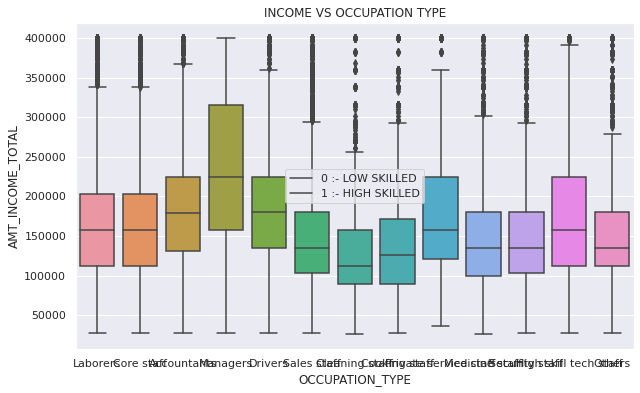

In [156]:
plt.figure(figsize=(10,6))
sns.boxplot(y= final_application["AMT_INCOME_TOTAL"], x=final_application["OCCUPATION_TYPE"])
plt.title("INCOME VS OCCUPATION TYPE")
plt.legend(["0 :- LOW SKILLED", '1 :- HIGH SKILLED'])

In [157]:
final_application['OCCUPATION_TYPE'] = final_application['OCCUPATION_TYPE'].fillna("Others")

In [158]:
missing(final_application)

Total    Percent
OWN_CAR_AGE                              202929  65.990810
EXT_SOURCE_1                             173378  56.381073
LOW_SKILLED_OCCUPATION                    96391  31.345545
EXT_SOURCE_3                              60965  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR                41519  13.501631
AMT_REQ_CREDIT_BUREAU_HOUR                41519  13.501631
AMT_REQ_CREDIT_BUREAU_DAY                 41519  13.501631
AMT_REQ_CREDIT_BUREAU_WEEK                41519  13.501631
AMT_REQ_CREDIT_BUREAU_QRT                 41519  13.501631
AMT_REQ_CREDIT_BUREAU_MON                 41519  13.501631
DEF_60_CNT_SOCIAL_CIRCLE                   1021   0.332021
OBS_60_CNT_SOCIAL_CIRCLE                   1021   0.332021
OBS_30_CNT_SOCIAL_CIRCLE                   1021   0.332021
DEF_30_CNT_SOCIAL_CIRCLE                   1021   0.332021
EXT_SOURCE_2                                660   0.214626
AMT_GOODS_PRICE                             278   0.090403
AMT_ANNUITY                                  12   0.003902
CNT_FAM_MEMBERS                               2   0.000650
DAYS_LAST_PHONE_CHANGE                        1   0.000325
NAME_EDUCATION_TYPE                           0   0.000000
OCCUPATION_TYPE                               0   0.000000
FLAG_EMAIL                                    0   0.000000
FLAG_PHONE                                    0   0.000000
FLAG_CONT_MOBILE                              0   0.000000
FLAG_WORK_PHONE                               0   0.000000
FLAG_EMP_PHONE                                0   0.000000
FLAG_MOBIL                                    0   0.000000
TARGET                                        0   0.000000
NAME_CONTRACT_TYPE                            0   0.000000
DAYS_REGISTRATION                             0   0.000000
CODE_GENDER                                   0   0.000000
DAYS_ID_PUBLISH                               0   0.000000
DAYS_BIRTH                                    0   0.000000
DAYS_EMPLOYED                                 0   0.000000
NAME_INCOME_TYPE                              0   0.000000
FLAG_OWN_CAR                                  0   0.000000
CNT_CHILDREN                                  0   0.000000
AMT_INCOME_TOTAL                              0   0.000000
REGION_RATING_CLIENT                          0   0.000000
AMT_CREDIT                                    0   0.000000
NAME_FAMILY_STATUS                            0   0.000000
REG_CITY_NOT_WORK_CITY                        0   0.000000
REGION_RATING_CLIENT_W_CITY                   0   0.000000
FLOORSMIN_AVG                                 0   0.000000
TOTAL_DOCUMENT_SUBMITTED_LE                   0   0.000000
FONDKAPREMONT_MODE                            0   0.000000
NAME_HOUSING_TYPE                             0   0.000000
NAME_TYPE_SUITE                               0   0.000000
FLAG_OWN_REALTY                               0   0.000000
BASEMENT_ELEVATORS_ENTERANCE_LIVINGAREA       0   0.000000
LANDAREA_MEDI                                 0   0.000000
YEARS_BEGINEXPLUATATION_MEDI                  0   0.000000
YEARS_BUILD_MODE                              0   0.000000
NONLIVINGAREA_AVG                             0   0.000000
NONLIVINGAPARTMENTS_AVG                       0   0.000000
COMMONAREA_AVG                                0   0.000000
WEEKDAY_APPR_PROCESS_START                    0   0.000000
REGION_POPULATION_RELATIVE                    0   0.000000
REGION_POPULATION_CLASS                       0   0.000000
INCOME_CLASS                                  0   0.000000
ORGANIZATION_TYPE                             0   0.000000
LIVE_CITY_NOT_WORK_CITY                       0   0.000000
TOTAL_DOCUMENT_SUBMITTED_GT                   0   0.000000
REG_CITY_NOT_LIVE_CITY                        0   0.000000
LIVE_REGION_NOT_WORK_REGION                   0   0.000000
REG_REGION_NOT_WORK_REGION                    0   0.000000
REG_REGION_NOT_LIVE_REGION                    0   0.000000
HOUR_APPR_PROCESS_START       

In [159]:
final_application[final_application.AMT_ANNUITY.isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
47531              0          180000.0    450000.0          NaN   
50035              0           94500.0    450000.0          NaN   
51594              0          202500.0    539100.0          NaN   
55025              0          162000.0    296280.0          NaN   
59934              0          202500.0    360000.0          NaN   
75873              0          144000.0    219249.0          NaN   
89343              0           90000.0    157500.0          NaN   
123872             0          202500.0    929088.0          NaN   
207186             0          171000.0    486000.0          NaN   
227939             0          315000.0    628069.5          NaN   
239329             0          157500.0    792000.0          NaN   
241835             0          315000.0   1483231.5          NaN   

        AMT_GOODS_PRICE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
47531          450000.0  Commercial associate              Incomplete higher   
50035          450000.0               Working                Lower secondary   
51594          450000.0               Working  Secondary / secondary special   
55025          225000.0         State servant               Higher education   
59934          360000.0               Working  Secondary / secondary special   
75873          166500.0               Working               Higher education   
89343          157500.0         State servant  Secondary / secondary special   
123872         720000.0               Working  Secondary / secondary special   
207186         486000.0  Commercial associate               Higher education   
227939         499500.0  Commercial associate               Higher education   
239329         792000.0         State servant  Secondary / secondary special   
241835        1354500.0               Working               Higher education   

          NAME_FAMILY_STATUS  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
47531   Single / not married      -10668          -2523            -4946.0   
50035         Civil marriage       -9027          -1270            -3640.0   
51594                Married      -17376          -3950           -11524.0   
55025                Married      -11329          -2040            -3195.0   
59934   Single / not married      -19762          -2498           -11285.0   
75873   Single / not married      -20831          -2450             -771.0   
89343                Married      -12134          -3721             -858.0   
123872        Civil marriage      -13902          -3540             -168.0   
207186               Married      -10151           -472           -10127.0   
227939               Married      -16344          -1478             -482.0   
239329               Married      -17661          -2885            -8594.0   
241835               Married      -15072           -152            -7576.0   

        DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  \
47531             -3238          NaN           1 

In [160]:
final_application["AMT_ANNUITY"] = final_application["AMT_ANNUITY"].fillna(final_application.groupby('AMT_GOODS_PRICE')['AMT_ANNUITY'].transform('mean'))

In [161]:
final_application["AMT_GOODS_PRICE"] = final_application["AMT_GOODS_PRICE"].fillna(final_application.groupby('AMT_CREDIT')['AMT_GOODS_PRICE'].transform('median'))

In [162]:
val1 = round(final_application["EXT_SOURCE_1"].median(),2)
val2 = round(final_application["EXT_SOURCE_2"].median(),2)
val3 = round(final_application["EXT_SOURCE_3"].median(),2)

In [163]:
val3

0.54

In [164]:
final_application["EXT_SOURCE_1"] = final_application["EXT_SOURCE_1"].fillna(val1)
final_application["EXT_SOURCE_2"] = final_application["EXT_SOURCE_2"].fillna(val2)
final_application["EXT_SOURCE_3"] = final_application["EXT_SOURCE_3"].fillna(val3)

In [165]:
final_application = final_application.fillna(0)

In [166]:
final_application["AMT_REQ_CREDIT_BUREAU_YEAR"] =final_application["AMT_REQ_CREDIT_BUREAU_YEAR"].clip(0,10)
#print_crosstab(final_application,'AMT_REQ_CREDIT_BUREAU_YEAR')

In [167]:
final_application["AMT_REQ_CREDIT_BUREAU_QRT"] =final_application["AMT_REQ_CREDIT_BUREAU_QRT"].clip(0,4)
#print_crosstab(final_application,'AMT_REQ_CREDIT_BUREAU_QRT')

In [168]:
final_application["AMT_REQ_CREDIT_BUREAU_MON"] =final_application["AMT_REQ_CREDIT_BUREAU_MON"].clip(0,5)
#print_crosstab(final_application,'AMT_REQ_CREDIT_BUREAU_MON')

In [169]:
final_application["AMT_REQ_CREDIT_BUREAU_WEEK"] =final_application["AMT_REQ_CREDIT_BUREAU_WEEK"].clip(0,3)
#print_crosstab(final_application,'AMT_REQ_CREDIT_BUREAU_WEEK')

In [170]:
final_application["AMT_REQ_CREDIT_BUREAU_DAY"] =final_application["AMT_REQ_CREDIT_BUREAU_DAY"].clip(0,3)
#print_crosstab(final_application,'AMT_REQ_CREDIT_BUREAU_DAY')

In [171]:
final_application["AMT_REQ_CREDIT_BUREAU_HOUR"] =final_application["AMT_REQ_CREDIT_BUREAU_HOUR"].clip(0,2)
#print_crosstab(final_application,'AMT_REQ_CREDIT_BUREAU_HOUR')

In [172]:
final_application['total_amt_req_credit_bureau'] = (
  final_application['AMT_REQ_CREDIT_BUREAU_YEAR'] + 
  final_application['AMT_REQ_CREDIT_BUREAU_QRT'] + 
  final_application['AMT_REQ_CREDIT_BUREAU_MON'] + 
  final_application['AMT_REQ_CREDIT_BUREAU_WEEK']  + 
  final_application['AMT_REQ_CREDIT_BUREAU_DAY']  +
  final_application['AMT_REQ_CREDIT_BUREAU_HOUR'] )

In [173]:
final_application = final_application.drop(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], axis=1)

In [174]:
final_application["total_amt_req_credit_bureau"] =final_application["total_amt_req_credit_bureau"].clip(0,5)
print_crosstab(final_application,'total_amt_req_credit_bureau')

TARGET                            0      1   Total  Default %  \
total_amt_req_credit_bureau                                     
0.0                           84383   8047   92430      8.706   
1.0                           49917   3997   53914      7.414   
2.0                           47586   3973   51559      7.706   
3.0                           36360   3036   39396      7.706   
4.0                           25091   2160   27251      7.926   
5.0                           39349   3612   42961      8.408   
Total                        282686  24825  307511      8.073   

TARGET                       Default %- Overall  Population %- Overall  
total_amt_req_credit_bureau                                             
0.0                                      32.415                 30.057  
1.0                                      16.101                 17.532  
2.0                                      16.004                 16.767  
3.0                                      12.230                 12.811  
4.0                                       8.701                  8.862  
5.0                                      14.550                 13.971  
Total                                   100.000                100.000

In [175]:
print_crosstab(final_application,'total_amt_req_credit_bureau')

TARGET                            0      1   Total  Default %  \
total_amt_req_credit_bureau                                     
0.0                           84383   8047   92430      8.706   
1.0                           49917   3997   53914      7.414   
2.0                           47586   3973   51559      7.706   
3.0                           36360   3036   39396      7.706   
4.0                           25091   2160   27251      7.926   
5.0                           39349   3612   42961      8.408   
Total                        282686  24825  307511      8.073   

TARGET                       Default %- Overall  Population %- Overall  
total_amt_req_credit_bureau                                             
0.0                                      32.415                 30.057  
1.0                                      16.101                 17.532  
2.0                                      16.004                 16.767  
3.0                                      12.230                 12.811  
4.0                                       8.701                  8.862  
5.0                                      14.550                 13.971  
Total                                   100.000                100.000

In [176]:
final_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120          0.0   
1      -16765          -1188            -1186.0             -291          0.0   
2      -19046           -225            -4260.0            -2531         26.0   
3      -19005          -3039            -9833.0            -2437          0.0   
4      -19932          -3038            -4311.0            -3458          0.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0        Laborers              1.0                     2   
1           0      Core staff              2.0                     1   
2           0        Laborers              1.0                     2   
3           0        Laborers              2.0                     2   
4           0      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1               

In [177]:
print_crosstab(final_application,'FLAG_EMP_PHONE')

TARGET               0      1   Total  Default %  Default %- Overall  \
FLAG_EMP_PHONE                                                         
0                52395   2991   55386      5.400              12.048   
1               230291  21834  252125      8.660              87.952   
Total           282686  24825  307511      8.073             100.000   

TARGET          Population %- Overall  
FLAG_EMP_PHONE                         
0                              18.011  
1                              81.989  
Total                         100.000

In [178]:
print_crosstab(final_application,'FLAG_WORK_PHONE')

TARGET                0      1   Total  Default %  Default %- Overall  \
FLAG_WORK_PHONE                                                         
0                227282  18921  246203      7.685              76.218   
1                 55404   5904   61308      9.630              23.782   
Total            282686  24825  307511      8.073             100.000   

TARGET           Population %- Overall  
FLAG_WORK_PHONE                         
0                               80.063  
1                               19.937  
Total                          100.000

In [179]:
print_crosstab(final_application,'FLAG_CONT_MOBILE')

TARGET                 0      1   Total  Default %  Default %- Overall  \
FLAG_CONT_MOBILE                                                         
0                    529     45     574      7.840               0.181   
1                 282157  24780  306937      8.073              99.819   
Total             282686  24825  307511      8.073             100.000   

TARGET            Population %- Overall  
FLAG_CONT_MOBILE                         
0                                 0.187  
1                                99.813  
Total                           100.000

In [180]:
print_crosstab(final_application,'FLAG_PHONE')

TARGET           0      1   Total  Default %  Default %- Overall  \
FLAG_PHONE                                                         
0           202336  18744  221080      8.478              75.505   
1            80350   6081   86431      7.036              24.495   
Total       282686  24825  307511      8.073             100.000   

TARGET      Population %- Overall  
FLAG_PHONE                         
0                          71.893  
1                          28.107  
Total                     100.000

In [181]:
print_crosstab(final_application,'FLAG_EMAIL')

TARGET           0      1   Total  Default %  Default %- Overall  \
FLAG_EMAIL                                                         
0           266618  23451  290069      8.085              94.465   
1            16068   1374   17442      7.878               5.535   
Total       282686  24825  307511      8.073             100.000   

TARGET      Population %- Overall  
FLAG_EMAIL                         
0                          94.328  
1                           5.672  
Total                     100.000

In [182]:
final_application["COMMUNICATION_CHANNEL_ALTERNATE"] = (
                                              final_application["FLAG_EMP_PHONE"]+
                                              final_application["FLAG_WORK_PHONE"]+ 
                                             final_application["FLAG_CONT_MOBILE"] 
                                              )


In [183]:
print_crosstab(final_application,'COMMUNICATION_CHANNEL_ALTERNATE')

TARGET                                0      1   Total  Default %  \
COMMUNICATION_CHANNEL_ALTERNATE                                     
0                                    36      2      38      5.263   
1                                 52848   3032   55880      5.426   
2                                174402  15887  190289      8.349   
3                                 55400   5904   61304      9.631   
Total                            282686  24825  307511      8.073   

TARGET                           Default %- Overall  Population %- Overall  
COMMUNICATION_CHANNEL_ALTERNATE                                             
0                                             0.008                  0.012  
1                                            12.213                 18.172  
2                                            63.996                 61.880  
3                                            23.782                 19.936  
Total                                       100.000                100.000

In [184]:
final_application["COMMUNICATION_CHANNEL_DIRECT"] = (final_application["FLAG_PHONE"]+ 
                                             final_application["FLAG_EMAIL"])

In [185]:
print_crosstab(final_application,'COMMUNICATION_CHANNEL_DIRECT')

TARGET                             0      1   Total  Default %  \
COMMUNICATION_CHANNEL_DIRECT                                     
0                             191266  17743  209009      8.489   
1                              86422   6709   93131      7.204   
2                               4998    373    5371      6.945   
Total                         282686  24825  307511      8.073   

TARGET                        Default %- Overall  Population %- Overall  
COMMUNICATION_CHANNEL_DIRECT                                             
0                                         71.472                 67.968  
1                                         27.025                 30.285  
2                                          1.503                  1.747  
Total                                    100.000                100.000

In [186]:
final_application = final_application.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL'], axis=1)

In [187]:
final_application["OBS_30_CNT_SOCIAL_CIRCLE"] =final_application["OBS_30_CNT_SOCIAL_CIRCLE"].clip(0,4)
#print_crosstab(final_application,'OBS_30_CNT_SOCIAL_CIRCLE')

In [188]:
final_application["OBS_60_CNT_SOCIAL_CIRCLE"] =final_application["OBS_60_CNT_SOCIAL_CIRCLE"].clip(0,4)
#print_crosstab(final_application,'OBS_60_CNT_SOCIAL_CIRCLE')

In [189]:
final_application["DEF_30_CNT_SOCIAL_CIRCLE"] =final_application["DEF_30_CNT_SOCIAL_CIRCLE"].clip(0,4)
#print_crosstab(final_application,'DEF_30_CNT_SOCIAL_CIRCLE')

In [190]:
final_application["DEF_60_CNT_SOCIAL_CIRCLE"] =final_application["DEF_60_CNT_SOCIAL_CIRCLE"].clip(0,4)
#print_crosstab(final_application,'DEF_60_CNT_SOCIAL_CIRCLE')

In [191]:
final_application["DEFAULT_SOCIAL_CIRCLE"] = (
                                              final_application["DEF_30_CNT_SOCIAL_CIRCLE"]+ 
                                             final_application["DEF_60_CNT_SOCIAL_CIRCLE"] 
                                             )

In [192]:
final_application["OBS_SOCIAL_CIRCLE"] = (final_application["OBS_30_CNT_SOCIAL_CIRCLE"]+ 
                                              final_application["OBS_60_CNT_SOCIAL_CIRCLE"])

In [193]:
#final_application["OBS_DEFAULT_SOCIAL_CIRCLE"] =final_application["OBS_DEFAULT_SOCIAL_CIRCLE"].clip(0,4)
print_crosstab(final_application,'DEFAULT_SOCIAL_CIRCLE')

TARGET                      0      1   Total  Default %  Default %- Overall  \
DEFAULT_SOCIAL_CIRCLE                                                         
0.0                    251211  21134  272345      7.760              85.132   
1.0                      7663    803    8466      9.485               3.235   
2.0                     18505   2151   20656     10.413               8.665   
3.0                      1686    204    1890     10.794               0.822   
4.0                      2579    374    2953     12.665               1.507   
5.0                       367     38     405      9.383               0.153   
6.0                       465     95     560     16.964               0.383   
7.0                        68      8      76     10.526               0.032   
8.0                       142     18     160     11.250               0.073   
Total                  282686  24825  307511      8.073             100.000   

TARGET                 Population %- Overall  
DEFAULT_SOCIAL_CIRCLE                         
0.0                                   88.564  
1.0                                    2.753  
2.0                                    6.717  
3.0                                    0.615  
4.0                                    0.960  
5.0                                    0.132  
6.0                                    0.182  
7.0                                    0.025  
8.0                                    0.052  
Total                                100.000

In [194]:
#final_application["OBS_DEFAULT_SOCIAL_CIRCLE"] =final_application["OBS_DEFAULT_SOCIAL_CIRCLE"].clip(0,4)
print_crosstab(final_application,'OBS_SOCIAL_CIRCLE')

TARGET                  0      1   Total  Default %  Default %- Overall  \
OBS_SOCIAL_CIRCLE                                                         
0.0                151945  12986  164931      7.874              52.310   
1.0                   676     68     744      9.140               0.274   
2.0                 44221   3830   48051      7.971              15.428   
3.0                   753     65     818      7.946               0.262   
4.0                 26599   2392   28991      8.251               9.635   
5.0                   707     55     762      7.218               0.222   
6.0                 17952   1621   19573      8.282               6.530   
7.0                   616     52     668      7.784               0.209   
8.0                 39217   3756   42973      8.740              15.130   
Total              282686  24825  307511      8.073             100.000   

TARGET             Population %- Overall  
OBS_SOCIAL_CIRCLE                         
0.0                               53.634  
1.0                                0.242  
2.0                               15.626  
3.0                                0.266  
4.0                                9.428  
5.0                                0.248  
6.0                                6.365  
7.0                                0.217  
8.0                               13.974  
Total                            100.000

In [195]:
final_application = final_application.drop(["OBS_30_CNT_SOCIAL_CIRCLE",
                                           "DEF_30_CNT_SOCIAL_CIRCLE",
                                           "DEF_60_CNT_SOCIAL_CIRCLE",
                                           "OBS_60_CNT_SOCIAL_CIRCLE"], axis=1)

In [196]:
final_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120          0.0   
1      -16765          -1188            -1186.0             -291          0.0   
2      -19046           -225            -4260.0            -2531         26.0   
3      -19005          -3039            -9833.0            -2437          0.0   
4      -19932          -3038            -4311.0            -3458          0.0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.083037      0.262949      0.139376   
1                  School      0.311267      0.622246      0.540000   
2              Government      0.510000    

In [197]:
final_application.shape

(307511, 58)

In [198]:
final_application["AGE"] = abs(final_application["DAYS_BIRTH"]//365)

In [199]:
final_application["MONTH_EMPLOYED"] = abs(final_application["DAYS_EMPLOYED"]//30)
#final_application["MONTH_REGISTRATION"] = abs(final_application["DAYS_REGISTRATION"]//30)
#final_application["MONTH_ID_PUBLISH"] = abs(final_application["DAYS_ID_PUBLISH"]//30)
#final_application["LAST_PHONE_CHANGE_MONTH"] = abs(final_application["DAYS_LAST_PHONE_CHANGE"]//30)


In [200]:
final_application = final_application.drop(["DAYS_EMPLOYED", "DAYS_BIRTH"], axis =1)

In [201]:
final_application = final_application.drop("REGION_POPULATION_CLASS", axis=1)

In [202]:
final_application.shape

(307511, 57)

In [203]:
final_application["NAME_INCOME_TYPE"].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [204]:

#
final_application["NAME_INCOME_TYPE"] = final_application["NAME_INCOME_TYPE"].replace(["Unemployed","Student", "Businessman",
                                                                                     "Maternity leave"]
                                                                                    , "Others")

In [205]:
print_crosstab(final_application,'NAME_INCOME_TYPE')

TARGET                     0      1   Total  Default %  Default %- Overall  \
NAME_INCOME_TYPE                                                             
Commercial associate   66257   5360   71617      7.484              21.591   
Others                    45     10      55     18.182               0.040   
Pensioner              52380   2982   55362      5.386              12.012   
State servant          20454   1249   21703      5.755               5.031   
Working               143550  15224  158774      9.588              61.325   
Total                 282686  24825  307511      8.073             100.000   

TARGET                Population %- Overall  
NAME_INCOME_TYPE                             
Commercial associate                 23.289  
Others                                0.018  
Pensioner                            18.003  
State servant                         7.058  
Working                              51.632  
Total                               100.000

In [206]:

final_application["NAME_EDUCATION_TYPE"] = final_application["NAME_EDUCATION_TYPE"].replace(["Academic degree"]
                                                                                    , "Higher education")

In [207]:
print_crosstab(final_application,'NAME_EDUCATION_TYPE')

TARGET                              0      1   Total  Default %  \
NAME_EDUCATION_TYPE                                               
Higher education                71015   4012   75027      5.347   
Incomplete higher                9405    872   10277      8.485   
Lower secondary                  3399    417    3816     10.928   
Secondary / secondary special  198867  19524  218391      8.940   
Total                          282686  24825  307511      8.073   

TARGET                         Default %- Overall  Population %- Overall  
NAME_EDUCATION_TYPE                                                       
Higher education                           16.161                 24.398  
Incomplete higher                           3.513                  3.342  
Lower secondary                             1.680                  1.241  
Secondary / secondary special              78.647                 71.019  
Total                                     100.000                100.000

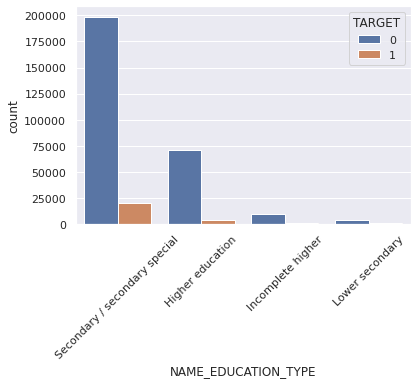

In [208]:
ax = sns.countplot(x="NAME_EDUCATION_TYPE", data=final_application, hue= 'TARGET')
plt.xticks(rotation=45)
plt.show()

In [209]:
final_application["NAME_EDUCATION_TYPE"] = final_application["NAME_EDUCATION_TYPE"].map({"Lower secondary":1,
                                                                                        "Secondary / secondary special":2,
                                                                                        "Incomplete higher":3,
                                                                                        "Higher education":4})

In [210]:
print_crosstab(final_application,'NAME_FAMILY_STATUS')

TARGET                     0      1   Total  Default %  Default %- Overall  \
NAME_FAMILY_STATUS                                                           
Civil marriage         26814   2961   29775      9.945              11.927   
Married               181582  14850  196432      7.560              59.819   
Separated              18150   1620   19770      8.194               6.526   
Single / not married   40987   4457   45444      9.808              17.954   
Unknown                    2      0       2      0.000               0.000   
Widow                  15151    937   16088      5.824               3.774   
Total                 282686  24825  307511      8.073             100.000   

TARGET                Population %- Overall  
NAME_FAMILY_STATUS                           
Civil marriage                        9.683  
Married                              63.878  
Separated                             6.429  
Single / not married                 14.778  
Unknown                               0.001  
Widow                                 5.232  
Total                               100.000

In [211]:
final_application["NAME_FAMILY_STATUS"] = final_application["NAME_FAMILY_STATUS"].replace("Single / not married", "Unmarried")
final_application["NAME_FAMILY_STATUS"] = final_application["NAME_FAMILY_STATUS"].replace("Unknown", "Others")

In [212]:
final_application.loc[final_application['ORGANIZATION_TYPE'].str.contains('Industry'), 'ORGANIZATION_TYPE'] = 'Industry'
final_application.loc[final_application['ORGANIZATION_TYPE'].str.contains('Business'), 'ORGANIZATION_TYPE'] = 'Business'
final_application.loc[final_application['ORGANIZATION_TYPE'].str.contains('Trade'), 'ORGANIZATION_TYPE'] = 'Trade'
final_application.loc[final_application['ORGANIZATION_TYPE'].str.contains('Transport'), 'ORGANIZATION_TYPE'] = 'Transport'


In [213]:
print_crosstab(final_application,'ORGANIZATION_TYPE')

TARGET                    0      1   Total  Default %  Default %- Overall  \
ORGANIZATION_TYPE                                                           
Advertising             394     35     429      8.159               0.141   
Agriculture            2197    257    2454     10.473               1.035   
Bank                   2377    130    2507      5.185               0.524   
Business              76819   7710   84529      9.121              31.057   
Cleaning                231     29     260     11.154               0.117   
Construction           5936    785    6721     11.680               3.162   
Culture                 358     21     379      5.541               0.085   
Electricity             887     63     950      6.632               0.254   
Emergency               520     40     560      7.143               0.161   
Government             9678    726   10404      6.978               2.924   
Hotel                   904     62     966      6.418               0.250   
Housing                2723    235    2958      7.945               0.947   
Industry              13080   1231   14311      8.602               4.959   
Insurance               563     34     597      5.695               0.137   
Kindergarten           6396    484    6880      7.035               1.950   
Legal Services          281     24     305      7.869               0.097   
Medicine              10456    737   11193      6.584               2.969   
Military               2499    135    2634      5.125               0.544   
Mobile                  288     29     317      9.148               0.117   
Other                 15408   1275   16683      7.643               5.136   
Police                 2224    117    2341      4.998               0.471   
Postal                 1975    182    2157      8.438               0.733   
Realtor                 354     42     396     10.606               0.169   
Religion                 80      5      85      5.882               0.020   
Restaurant             1599    212    1811     11.706               0.854   
School                 8367    526    8893      5.915               2.119   
Security               2923    324    3247      9.978               1.305   
Security Ministries    1878     96    1974      4.863               0.387   
Self-employed         34504   3908   38412     10.174              15.742   
Services               1471    104    1575      6.603               0.419   
Telecom                 533     44     577      7.626               0.177   
Trade                 13016   1299   14315      9.074               5.233   
Transport              8121    869    8990      9.666               3.501   
University             1262     65    1327      4.898               0.262   
XNA                   52384   2990   55374      5.400              12.044   
Total                282686  24825  307511      8.073             100.000   

TARGET               Population %- Overall  
ORGANIZATION_TYPE                           
Advertising                          0.140  
Agriculture                          0.798  
Bank                                 0.815  
Business                            27.488  
Cleaning                             0.085  
Construction                         2.186  
Culture                              0.123  
Electricity                          0.309  
Emergency                            0.182  
Government                           3.383  
Hotel                                0.314  
Housing                              0.962  
Industry                             4.654  
Insurance                            0.194  
Kindergarten                         2.237  
Legal Services                       0.099  
Medicine                             3.640  
Military                             0.857  
Mobile                               0.103  
Other                                5.425  
Police                               0.761  
Postal                               0

In [214]:
final_application["CNT_CHILDREN"] =final_application["CNT_CHILDREN"].clip(0,4)
print_crosstab(final_application,'CNT_CHILDREN')

TARGET             0      1   Total  Default %  Default %- Overall  \
CNT_CHILDREN                                                         
0             198762  16609  215371      7.712              66.904   
1              55665   5454   61119      8.924              21.970   
2              24416   2333   26749      8.722               9.398   
3               3359    358    3717      9.631               1.442   
4                484     71     555     12.793               0.286   
Total         282686  24825  307511      8.073             100.000   

TARGET        Population %- Overall  
CNT_CHILDREN                         
0                            70.037  
1                            19.875  
2                             8.699  
3                             1.209  
4                             0.180  
Total                       100.000

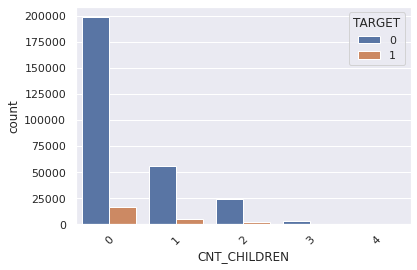

In [215]:
ax = sns.countplot(x="CNT_CHILDREN", data=final_application, hue= 'TARGET')
plt.xticks(rotation=45)
plt.show()

In [216]:
final_application["CODE_GENDER"] = final_application["CODE_GENDER"].replace({"M":1, "F":0})
final_application["FLAG_OWN_CAR"] = final_application["FLAG_OWN_CAR"].replace({"Y":1, "N":0})
final_application["FLAG_OWN_REALTY"] = final_application["FLAG_OWN_REALTY"].replace({"Y":1, "N":0})
final_application["INCOME_CLASS"] = final_application["INCOME_CLASS"].replace({"UPPER":3, "MIDDLE":1, "LOWER":0, "UPPER_MIDDLE":2})

In [217]:
final_application["NAME_CONTRACT_TYPE"] = final_application["NAME_CONTRACT_TYPE"].replace({"Cash loans":1, "Revolving loans":0})

In [218]:
final_application["CODE_GENDER"]=final_application["CODE_GENDER"].replace("XNA",0)

In [219]:
final_application[["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "INCOME_CLASS", "NAME_CONTRACT_TYPE"]] = final_application[["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "INCOME_CLASS", "NAME_CONTRACT_TYPE"]].astype('int')

In [220]:
final_application.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   1            1             0   
1      100003       0                   1            0             0   
2      100004       0                   0            1             1   
3      100006       0                   1            0             0   
4      100007       0                   1            1             0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  DAYS_REGISTRATION  \
0          Working                    2          Unmarried            -3648.0   
1    State servant                    4            Married            -1186.0   
2          Working                    2          Unmarried            -4260.0   
3          Working                    2     Civil marriage            -9833.0   
4          Working                    2          Unmarried            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            -2120          0.0        Laborers              1.0   
1             -291          0.0      Core staff              2.0   
2            -2531         26.0        Laborers              1.0   
3            -2437          0.0        Laborers              2.0   
4            -3458          0.0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
0                       0                        0          Business   
1                       0                        0            School   
2                       0                        0        Government   
3                       0                        0          Business   
4                       1                        1          Religion   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  \
0      0.083037      0.262949      0.139376                 -1134.0   
1      0.311267      0.622246      0.540000                  -828.0   
2      0.510000      0.555912      0.729567                  -815.0   
3      0.510000      0.650442      0.540000                  -617.0   
4      0.510000

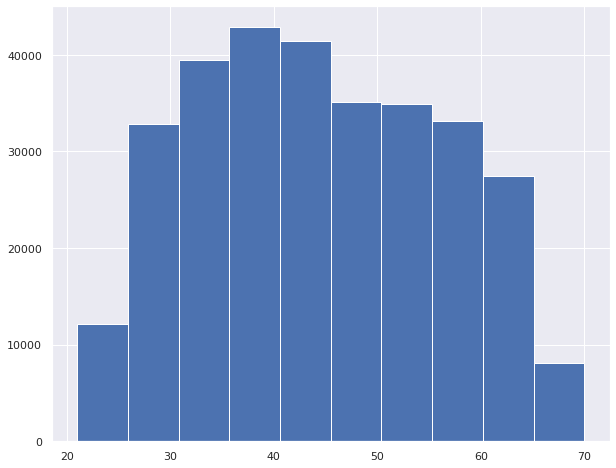

In [221]:
plt.figure(figsize=(10,8))
plt.hist(final_application["AGE"])
plt.show()

In [222]:
final_application.shape

(307511, 57)

In [223]:
final_application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 57 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   SK_ID_CURR                               307511 non-null  int64  
 1   TARGET                                   307511 non-null  int64  
 2   NAME_CONTRACT_TYPE                       307511 non-null  int64  
 3   CODE_GENDER                              307511 non-null  int64  
 4   FLAG_OWN_CAR                             307511 non-null  int64  
 5   CNT_CHILDREN                             307511 non-null  int64  
 6   AMT_INCOME_TOTAL                         307511 non-null  float64
 7   AMT_CREDIT                               307511 non-null  float64
 8   AMT_ANNUITY                              307511 non-null  float64
 9   AMT_GOODS_PRICE                          307511 non-null  float64
 10  NAME_INCOME_TYPE                

In [224]:
categorical_features = final_application.select_dtypes(['object'])
categorical_features

NAME_INCOME_TYPE NAME_FAMILY_STATUS OCCUPATION_TYPE  \
0                    Working          Unmarried        Laborers   
1              State servant            Married      Core staff   
2                    Working          Unmarried        Laborers   
3                    Working     Civil marriage        Laborers   
4                    Working          Unmarried      Core staff   
...                      ...                ...             ...   
307506               Working          Separated     Sales staff   
307507             Pensioner              Widow          Others   
307508               Working          Separated        Managers   
307509  Commercial associate            Married        Laborers   
307510  Commercial associate            Married        Laborers   

       WEEKDAY_APPR_PROCESS_START ORGANIZATION_TYPE NAME_TYPE_SUITE  \
0                       WEDNESDAY          Business   Unaccompanied   
1                          MONDAY            School          Family   
2                          MONDAY        Government   Unaccompanied   
3                       WEDNESDAY          Business   Unaccompanied   
4                        THURSDAY          Religion   Unaccompanied   
...                           ...               ...             ...   
307506                   THURSDAY          Services   Unaccompanied   
307507                     MONDAY               XNA   Unaccompanied   
307508                   THURSDAY            School   Unaccompanied   
307509                  WEDNESDAY          Business   Unaccompanied   
307510                   THURSDAY          Business   Unaccompanied   

          NAME_HOUSING_TYPE FONDKAPREMONT_MODE  
0       own_house_apartment   reg oper account  
1       own_house_apartment   reg oper account  
2       own_house_apartment          NOT_AVAIL  
3       own_house_apartment          NOT_AVAIL  
4       own_house_apartment          NOT_AVAIL  
...                     ...                ...  
307506         with_parents   reg oper account  
307507  own_house_apartment   reg oper account  
307508  own_house_apartment   reg oper account  
307509  own_house_apartment          NOT_AVAIL  
307510  own_house_apartment          NOT_AVAIL  

[307511 rows x 8 columns]

In [225]:
dummies_features = pd.get_dummies(final_application["NAME_FAMILY_STATUS"])
dummies_features = dummies_features.drop("Others", axis=1)
final_application = pd.merge(final_application, dummies_features, left_index=True, right_index=True)
final_application = final_application.drop("NAME_FAMILY_STATUS", axis=1)
final_application.shape

(307511, 61)

In [226]:
dummies_features = pd.get_dummies(final_application["NAME_TYPE_SUITE"])
dummies_features = dummies_features.drop("Others", axis=1)
final_application = pd.merge(final_application, dummies_features, left_index=True, right_index=True)
final_application = final_application.drop("NAME_TYPE_SUITE", axis=1)
final_application.shape

(307511, 62)

In [227]:
dummies_features = pd.get_dummies(final_application["NAME_HOUSING_TYPE"])
dummies_features = dummies_features.drop("Others", axis=1)
final_application = pd.merge(final_application, dummies_features, left_index=True, right_index=True)
final_application = final_application.drop("NAME_HOUSING_TYPE", axis=1)
final_application.shape

(307511, 65)

In [228]:
dummies_features = pd.get_dummies(final_application["FONDKAPREMONT_MODE"])
dummies_features = dummies_features.drop(["NOT_AVAIL", "not specified"], axis=1)
final_application = pd.merge(final_application, dummies_features, left_index=True, right_index=True)
final_application = final_application.drop("FONDKAPREMONT_MODE", axis=1)
final_application.shape
#dummies_features.head()

(307511, 67)

In [229]:
dummies_features = pd.get_dummies(final_application["NAME_INCOME_TYPE"])
dummies_features = dummies_features.drop("Others", axis=1)
final_application = pd.merge(final_application, dummies_features, left_index=True, right_index=True)
final_application = final_application.drop("NAME_INCOME_TYPE", axis=1)
final_application.shape

(307511, 70)

In [230]:
dummies_features = pd.get_dummies(final_application["OCCUPATION_TYPE"])
dummies_features = dummies_features.drop("Others", axis=1)
final_application = pd.merge(final_application, dummies_features, left_index=True, right_index=True)
final_application = final_application.drop("OCCUPATION_TYPE", axis=1)
final_application.shape

(307511, 81)

In [231]:
print_crosstab(final_application,'WEEKDAY_APPR_PROCESS_START')

TARGET                           0      1   Total  Default %  \
WEEKDAY_APPR_PROCESS_START                                     
FRIDAY                       46237   4101   50338      8.147   
MONDAY                       46780   3934   50714      7.757   
SATURDAY                     31182   2670   33852      7.887   
SUNDAY                       14898   1283   16181      7.929   
THURSDAY                     46493   4098   50591      8.100   
TUESDAY                      49400   4501   53901      8.350   
WEDNESDAY                    47696   4238   51934      8.160   
Total                       282686  24825  307511      8.073   

TARGET                      Default %- Overall  Population %- Overall  
WEEKDAY_APPR_PROCESS_START                                             
FRIDAY                                  16.520                 16.369  
MONDAY                                  15.847                 16.492  
SATURDAY                                10.755                 11.008  
SUNDAY                                   5.168                  5.262  
THURSDAY                                16.508                 16.452  
TUESDAY                                 18.131                 17.528  
WEDNESDAY                               17.072                 16.889  
Total                                  100.000                100.000

In [232]:
dummies_features = pd.get_dummies(final_application["WEEKDAY_APPR_PROCESS_START"])
dummies_features = dummies_features.drop("SUNDAY", axis=1)
final_application = pd.merge(final_application, dummies_features, left_index=True, right_index=True)
final_application = final_application.drop("WEEKDAY_APPR_PROCESS_START", axis=1)
final_application.shape

(307511, 86)

In [233]:
print_crosstab(final_application,'ORGANIZATION_TYPE')

TARGET                    0      1   Total  Default %  Default %- Overall  \
ORGANIZATION_TYPE                                                           
Advertising             394     35     429      8.159               0.141   
Agriculture            2197    257    2454     10.473               1.035   
Bank                   2377    130    2507      5.185               0.524   
Business              76819   7710   84529      9.121              31.057   
Cleaning                231     29     260     11.154               0.117   
Construction           5936    785    6721     11.680               3.162   
Culture                 358     21     379      5.541               0.085   
Electricity             887     63     950      6.632               0.254   
Emergency               520     40     560      7.143               0.161   
Government             9678    726   10404      6.978               2.924   
Hotel                   904     62     966      6.418               0.250   
Housing                2723    235    2958      7.945               0.947   
Industry              13080   1231   14311      8.602               4.959   
Insurance               563     34     597      5.695               0.137   
Kindergarten           6396    484    6880      7.035               1.950   
Legal Services          281     24     305      7.869               0.097   
Medicine              10456    737   11193      6.584               2.969   
Military               2499    135    2634      5.125               0.544   
Mobile                  288     29     317      9.148               0.117   
Other                 15408   1275   16683      7.643               5.136   
Police                 2224    117    2341      4.998               0.471   
Postal                 1975    182    2157      8.438               0.733   
Realtor                 354     42     396     10.606               0.169   
Religion                 80      5      85      5.882               0.020   
Restaurant             1599    212    1811     11.706               0.854   
School                 8367    526    8893      5.915               2.119   
Security               2923    324    3247      9.978               1.305   
Security Ministries    1878     96    1974      4.863               0.387   
Self-employed         34504   3908   38412     10.174              15.742   
Services               1471    104    1575      6.603               0.419   
Telecom                 533     44     577      7.626               0.177   
Trade                 13016   1299   14315      9.074               5.233   
Transport              8121    869    8990      9.666               3.501   
University             1262     65    1327      4.898               0.262   
XNA                   52384   2990   55374      5.400              12.044   
Total                282686  24825  307511      8.073             100.000   

TARGET               Population %- Overall  
ORGANIZATION_TYPE                           
Advertising                          0.140  
Agriculture                          0.798  
Bank                                 0.815  
Business                            27.488  
Cleaning                             0.085  
Construction                         2.186  
Culture                              0.123  
Electricity                          0.309  
Emergency                            0.182  
Government                           3.383  
Hotel                                0.314  
Housing                              0.962  
Industry                             4.654  
Insurance                            0.194  
Kindergarten                         2.237  
Legal Services                       0.099  
Medicine                             3.640  
Military                             0.857  
Mobile                               0.103  
Other                                5.425  
Police                               0.761  
Postal                               0

In [234]:
dummies_features = pd.get_dummies(final_application["ORGANIZATION_TYPE"])
dummies_features = dummies_features.drop("XNA", axis=1)
final_application = pd.merge(final_application, dummies_features, left_index=True, right_index=True)
final_application = final_application.drop("ORGANIZATION_TYPE", axis=1)
final_application.shape

(307511, 119)

In [244]:
categorical_features = final_application.select_dtypes(['object'])
categorical_features

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[307511 rows x 0 columns]

In [236]:
final_application.shape

(307511, 119)

In [237]:
final_application['DIR'] = final_application.apply(lambda x: x['AMT_CREDIT']/x['AMT_INCOME_TOTAL'],axis =1)
final_application['AIR'] = final_application.apply(lambda x: x['AMT_ANNUITY']/x['AMT_INCOME_TOTAL'],axis=1)
final_application['ACR'] = final_application.apply(lambda x: x['AMT_ANNUITY']/x['AMT_CREDIT'], axis=1)
final_application['DAR'] = final_application.apply(lambda x: x['MONTH_EMPLOYED']/(12*x['AGE']), axis=1)

In [238]:
final_application['INCOME_PER_PERSON'] = final_application.apply(lambda x:x['AMT_INCOME_TOTAL'] /(1+x['CNT_FAM_MEMBERS']), axis=1)

In [239]:
final_application = final_application.drop(['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY',
                                           'MONTH_EMPLOYED', 'AGE', 'CNT_FAM_MEMBERS'], axis=1)

In [240]:
final_application.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   1            1             0   
1      100003       0                   1            0             0   
2      100004       0                   0            1             1   
3      100006       0                   1            0             0   
4      100007       0                   1            1             0   

   CNT_CHILDREN  AMT_GOODS_PRICE  NAME_EDUCATION_TYPE  DAYS_REGISTRATION  \
0             0         351000.0                    2            -3648.0   
1             0        1129500.0                    4            -1186.0   
2             0         135000.0                    2            -4260.0   
3             0         297000.0                    2            -9833.0   
4             0         513000.0                    2            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  REGION_RATING_CLIENT  \
0            -2120          0.0                     2   
1             -291          0.0                     1   
2            -2531         26.0                     2   
3            -2437          0.0                     2   
4            -3458          0.0                     2   

   REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                            2                       10   
1                            1                       11   
2                            2                        9   
3                            2                       17   
4                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
0                       0                        0      0.083037   
1                       0                        0      0.311267   
2                       0                        0      0.510000   
3                       0                        0      0.510000   
4                       1                        1      0.510000   

   EXT_SOURCE_2  EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  INCOME_CLASS  \
0      0.262949      0.139376                 -1134.0             2   
1      0.622246      0.540000                  -828.0             3   
2      0.555912      0.729567                  -815.0             0   
3      0.650442      0.540000                  -617.0             1   
4      0.322738      0.540000                 -1106.0             1   

   REGION_POPULATION_RELATIVE  COMMONAREA_AVG  FLOORSMIN_AVG  \
0                    0.018801          0.0143         0.1250   
1                    0.003541          0.0605         0.3333   
2                    0.010032          0.0000         0.0000   
3                    0.008019          0.0000         0.0000   
4                    0.028663          0.0000         0.0000   

   NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  YEARS_BUILD_MODE  \
0                   0.0000             0.0000            0.6341   
1                   0.0039             0.0098            0.8040   
2                   0.0000             0.0000            0.0000   
3                   0.0000             0.0000            0.0000   
4                   0.0000             0.0000            0.0000   

   YEARS_BEGINEXPLUATATION_MEDI  LANDAREA_MEDI  \
0                        

In [241]:
final_application.shape

(307511, 118)

In [242]:
missing(final_application)

Total  Percent
INCOME_PER_PERSON                            0      0.0
Civil marriage                               0      0.0
YEARS_BEGINEXPLUATATION_MEDI                 0      0.0
LANDAREA_MEDI                                0      0.0
BASEMENT_ELEVATORS_ENTERANCE_LIVINGAREA      0      0.0
FLAG_OWN_REALTY                              0      0.0
TOTAL_DOCUMENT_SUBMITTED_LE                  0      0.0
TOTAL_DOCUMENT_SUBMITTED_GT                  0      0.0
LOW_SKILLED_OCCUPATION                       0      0.0
total_amt_req_credit_bureau                  0      0.0
COMMUNICATION_CHANNEL_ALTERNATE              0      0.0
COMMUNICATION_CHANNEL_DIRECT                 0      0.0
DEFAULT_SOCIAL_CIRCLE                        0      0.0
OBS_SOCIAL_CIRCLE                            0      0.0
Married                                      0      0.0
NONLIVINGAREA_AVG                            0      0.0
Separated                                    0      0.0
Unmarried                                    0      0.0
Widow                                        0      0.0
Family                                       0      0.0
Unaccompanied                                0      0.0
Municipal                                    0      0.0
Rented                                       0      0.0
own_house_apartment                          0      0.0
with_parents                                 0      0.0
org spec account                             0      0.0
reg oper account                             0      0.0
reg oper spec account                        0      0.0
YEARS_BUILD_MODE                             0      0.0
NONLIVINGAPARTMENTS_AVG                      0      0.0
DAR                                          0      0.0
HOUR_APPR_PROCESS_START                      0      0.0
TARGET                                       0      0.0
NAME_CONTRACT_TYPE                           0      0.0
CODE_GENDER                                  0      0.0
FLAG_OWN_CAR                                 0      0.0
CNT_CHILDREN                                 0      0.0
AMT_GOODS_PRICE                              0      0.0
NAME_EDUCATION_TYPE                          0      0.0
DAYS_REGISTRATION                            0      0.0
DAYS_ID_PUBLISH                              0      0.0
OWN_CAR_AGE                                  0      0.0
REGION_RATING_CLIENT                         0      0.0
REGION_RATING_CLIENT_W_CITY                  0      0.0
REG_REGION_NOT_LIVE_REGION                   0      0.0
FLOORSMIN_AVG                                0      0.0
REG_REGION_NOT_WORK_REGION                   0      0.0
LIVE_REGION_NOT_WORK_REGION                  0      0.0
REG_CITY_NOT_LIVE_CITY                       0      0.0
REG_CITY_NOT_WORK_CITY                       0      0.0
LIVE_CITY_NOT_WORK_CITY                      0      0.0
EXT_SOURCE_1                                 0      0.0
EXT_SOURCE_2                                 0      0.0
EXT_SOURCE_3                                 0      0.0
DAYS_LAST_PHONE_CHANGE                       0      0.0
INCOME_CLASS                                 0      0.0
REGION_POPULATION_RELATIVE                   0      0.0
COMMONAREA_AVG                               0      0.0
Commercial associate                         0      0.0
Pensioner                                    0      0.0
State servant                                0      0.0
Religion                                     0      0.0
Housing                                      0      0.0
Industry                                     0      0.0
Insurance                                    0      0.0
Kindergarten                                 0      0.0
Legal Services                               0      0.0
Medicine                                     0      0.0
Military                                     0      0.0
Mobile                                       0      0.0
Other                                        0      0.0
Police   

In [247]:
final_application['CNT_FAM_MEMBERS'].min()

KeyError: 'CNT_FAM_MEMBERS'

In [ ]:
final_application['CHILDREN_RATIO'] = final_application['CNT_CHILDREN'] / final_application['CNT_FAM_MEMBERS']

In [243]:
final_application.to_csv("Prepared_Data/application_train_data.csv", index = False)